In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

In [76]:
def configurar_plot_com_dimensoes(titulo, x, y, h, w):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(h, w)
    plt.show()

In [77]:
def configurar_plot(titulo, x, y):
    configurar_plot_com_dimensoes(titulo, x, y, 16, 8)

In [78]:
df = pd.read_csv('dados/Most Popular Programming Languages from 2004 to 2021 V4.csv')
df.head(10)

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.08,4.71,0.43,0.0,2.82,0.0,0.03,...,18.75,2.53,0.39,0.33,0.08,0.03,0.0,0.0,1.44,8.56
1,August 2004,0.36,0.36,9.81,4.99,0.46,0.0,2.67,0.0,0.07,...,19.26,2.64,0.41,0.40,0.09,0.03,0.0,0.0,1.46,8.57
2,September 2004,0.41,0.41,9.63,5.06,0.51,0.0,2.65,0.0,0.08,...,19.49,2.72,0.40,0.41,0.10,0.03,0.0,0.0,1.55,8.41
3,October 2004,0.40,0.38,9.50,5.31,0.53,0.0,2.77,0.0,0.09,...,19.34,2.92,0.42,0.46,0.11,0.04,0.0,0.0,1.61,8.49
4,November 2004,0.38,0.38,9.52,5.24,0.55,0.0,2.76,0.0,0.07,...,19.43,2.84,0.41,0.45,0.13,0.04,0.0,0.0,1.50,8.24
5,December 2004,0.36,0.37,9.56,5.23,0.53,0.0,2.77,0.0,0.09,...,19.73,2.71,0.40,0.42,0.13,0.04,0.0,0.0,1.46,8.08
6,January 2005,0.39,0.38,9.70,5.23,0.56,0.0,2.65,0.0,0.11,...,19.81,2.91,0.39,0.47,0.15,0.03,0.0,0.0,1.51,7.79
7,February 2005,0.37,0.39,9.88,5.21,0.49,0.0,2.66,0.0,0.07,...,19.63,2.87,0.38,0.45,0.15,0.03,0.0,0.0,1.45,7.67
8,March 2005,0.34,0.37,9.88,5.38,0.45,0.0,2.65,0.0,0.08,...,19.54,2.81,0.42,0.46,0.13,0.03,0.0,0.0,1.44,7.68
9,April 2005,0.34,0.36,9.85,5.42,0.41,0.0,2.56,0.0,0.08,...,19.93,2.78,0.40,0.43,0.11,0.02,0.0,0.0,1.36,7.52


In [79]:
df.shape

(203, 29)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 29 columns):
Date            203 non-null object
Abap            203 non-null float64
Ada             203 non-null float64
C/C++           203 non-null float64
C#              203 non-null float64
Cobol           203 non-null float64
Dart            203 non-null float64
Delphi          203 non-null float64
Go              203 non-null float64
Groovy          203 non-null float64
Haskell         203 non-null float64
Java            203 non-null float64
JavaScript      203 non-null float64
Julia           203 non-null float64
Kotlin          203 non-null float64
Lua             203 non-null float64
Matlab          203 non-null float64
Objective-C     203 non-null float64
Perl            203 non-null float64
PHP             203 non-null float64
Python          203 non-null float64
R               203 non-null float64
Ruby            203 non-null float64
Rust            203 non-null float64
Scala   

In [81]:
df.describe()

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,Haskell,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.498030,0.311478,8.333251,7.603202,0.381034,0.121576,1.055172,0.322906,0.334089,0.298621,...,14.152020,11.917882,2.119803,2.112365,0.246404,0.538867,1.109409,0.470788,1.679015,3.718818
std,0.102097,0.110269,1.807976,1.306233,0.071528,0.149658,0.757032,0.451741,0.137936,0.039728,...,4.983405,8.768295,1.351934,0.707304,0.254726,0.438289,1.387316,0.695970,0.333993,2.206892
min,0.320000,0.170000,5.610000,4.710000,0.250000,0.000000,0.230000,0.000000,0.030000,0.200000,...,5.810000,2.530000,0.380000,0.330000,0.050000,0.010000,0.000000,0.000000,1.100000,0.670000
25%,0.400000,0.230000,7.395000,6.575000,0.320000,0.000000,0.370000,0.000000,0.260000,0.280000,...,9.990000,5.435000,0.855000,1.580000,0.080000,0.150000,0.000000,0.000000,1.440000,1.580000
50%,0.510000,0.300000,8.080000,7.330000,0.370000,0.110000,0.810000,0.080000,0.380000,0.300000,...,14.500000,8.440000,1.880000,2.440000,0.120000,0.410000,0.000000,0.030000,1.610000,3.700000
75%,0.580000,0.360000,8.940000,8.935000,0.430000,0.135000,1.680000,0.505000,0.450000,0.320000,...,19.300000,15.925000,3.685000,2.650000,0.340000,1.000000,2.455000,1.035000,1.780000,5.375000
max,0.720000,0.770000,13.000000,10.000000,0.560000,0.580000,2.820000,1.460000,0.520000,0.390000,...,20.840000,32.110000,4.250000,2.940000,1.140000,1.370000,3.580000,1.930000,2.640000,8.570000


In [82]:
meses = sorted(list(set([i.split(' ')[0] for i in df['Date'].unique()])))
anos = sorted(list(set([i.split(' ')[1] for i in df['Date'].unique()])))
print('Meses: {}\nAnos: {}'.format(meses, anos))

Meses: ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']
Anos: ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [83]:
for column in df.columns:
    print(column)
print('\nTotal de colunas: {}.'.format(len(df.columns)))

Date
Abap
Ada
C/C++
C#
Cobol
Dart
Delphi
Go
Groovy
Haskell
Java
JavaScript
Julia
Kotlin
Lua
Matlab
Objective-C
Perl
PHP
Python
R
Ruby
Rust
Scala
Swift
TypeScript
VBA
Visual Basic

Total de colunas: 29.


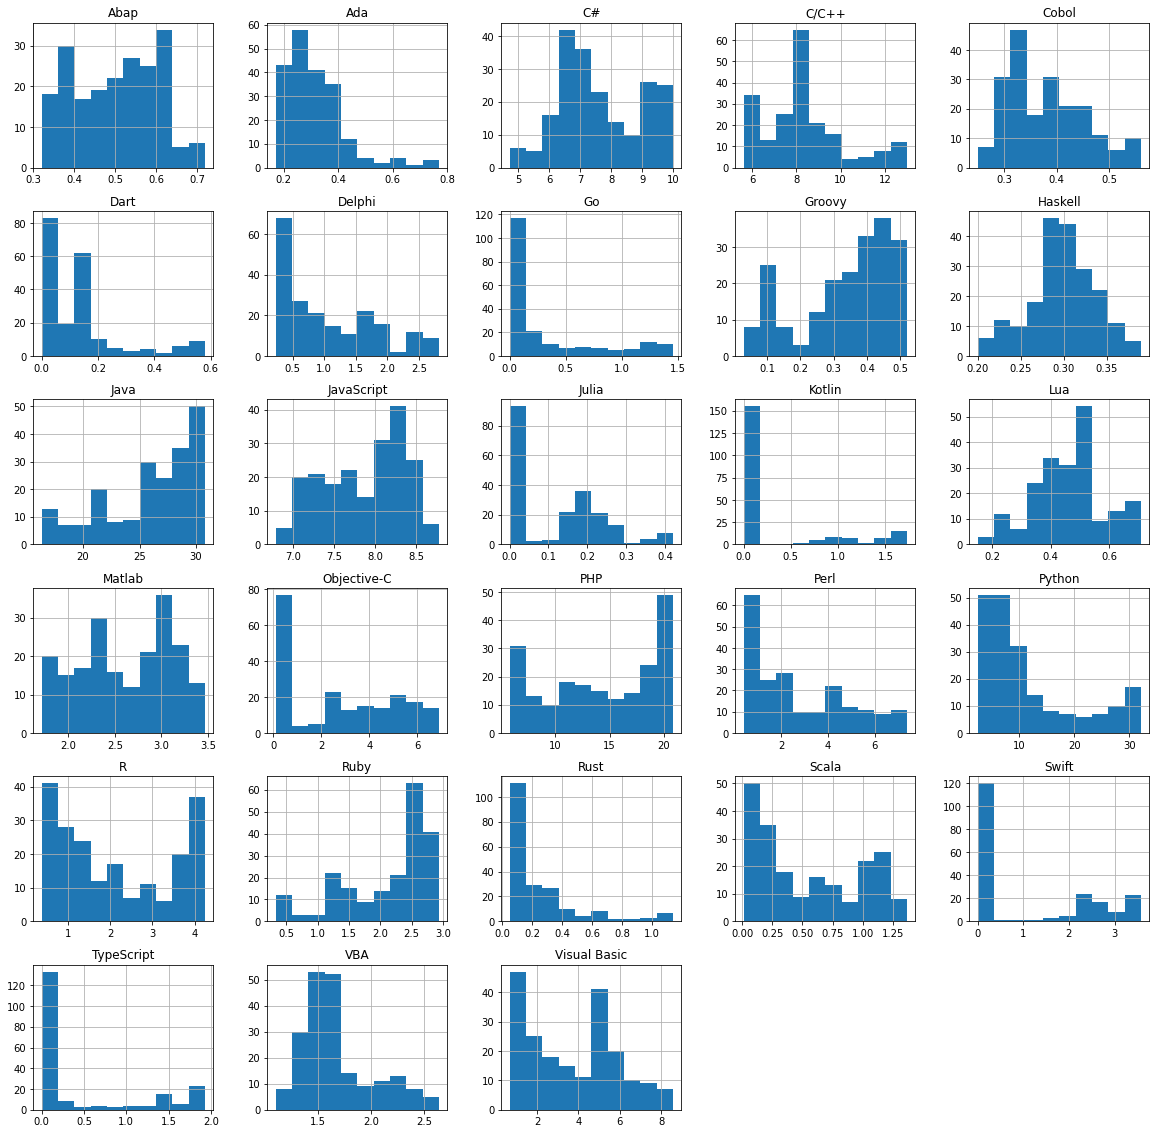

In [84]:
df.hist()
configurar_plot_com_dimensoes('Histograma Linguagens', '', '', 20, 20)
plt.show()

In [85]:
def createDataFrameFor(df, colunas, colunaAtual):
    return pd.DataFrame(
        {
            'Date': df.Date,
            'Year': pd.DatetimeIndex(df['Date']).year,
            'Timestamp': map(lambda i : datetime.strptime(df["Date"][i], '%B %Y'), range(len(df.Date))),
            'Language': colunas[colunaAtual],
            'Value': df[df.columns[colunaAtual]]
        }
    )

colunas = df.columns

dados_tratados = createDataFrameFor(df, colunas, 1)

for coluna in range(1, len(colunas)):
    dados_tratados = pd.concat([dados_tratados, createDataFrameFor(df, colunas, coluna)])

dados_tratados.reset_index(drop=True, inplace=True)

dados_tratados['UnixTime'] = list(map(lambda i: \
                                   (pd.to_datetime([dados_tratados['Timestamp'][i]]).astype(int) / 10**9)[0],\
                                   range(len(dados_tratados['Date']))))

dados_tratados.head()

,Date,Year,Timestamp,Language,Value,UnixTime
0,July 2004,2004,2004-07-01,Abap,0.34,1.088640e+09
1,August 2004,2004,2004-08-01,Abap,0.36,1.091318e+09
2,September 2004,2004,2004-09-01,Abap,0.41,1.093997e+09
3,October 2004,2004,2004-10-01,Abap,0.40,1.096589e+09
4,November 2004,2004,2004-11-01,Abap,0.38,1.099267e+09


In [86]:
dados_tratados.to_csv('dados/Dados.csv')

In [87]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5887 entries, 0 to 5886
Data columns (total 6 columns):
Date         5887 non-null object
Year         5887 non-null int64
Timestamp    5887 non-null datetime64[ns]
Language     5887 non-null object
Value        5887 non-null float64
UnixTime     5887 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 276.1+ KB


In [88]:
dados_tratados.shape

(5887, 6)

In [89]:
dados_tratados.describe()

,Year,Value,UnixTime
count,5887.000000,5887.000000,5.887000e+03
mean,2012.458128,3.465436,1.354277e+09
std,4.900599,6.019926,1.541191e+08
min,2004.000000,0.000000,1.088640e+09
25%,2008.000000,0.280000,1.220227e+09
50%,2012.000000,0.670000,1.354320e+09
75%,2017.000000,3.830000,1.488326e+09
max,2021.000000,32.110000,1.619827e+09


In [90]:
dados_agrupados = dados_tratados[['Language', 'Value']].groupby(by=['Language'], as_index=False).sum()

dados_agrupados = dados_agrupados.sort_values(by=['Value'], ascending=False)

dados_agrupados

,Language,Value
10,Java,5265.13
17,PHP,2872.86
19,Python,2419.33
3,C/C++,1691.65
11,JavaScript,1598.16
2,C#,1543.45
27,Visual Basic,754.92
16,Objective-C,546.40
18,Perl,543.92
15,Matlab,531.17


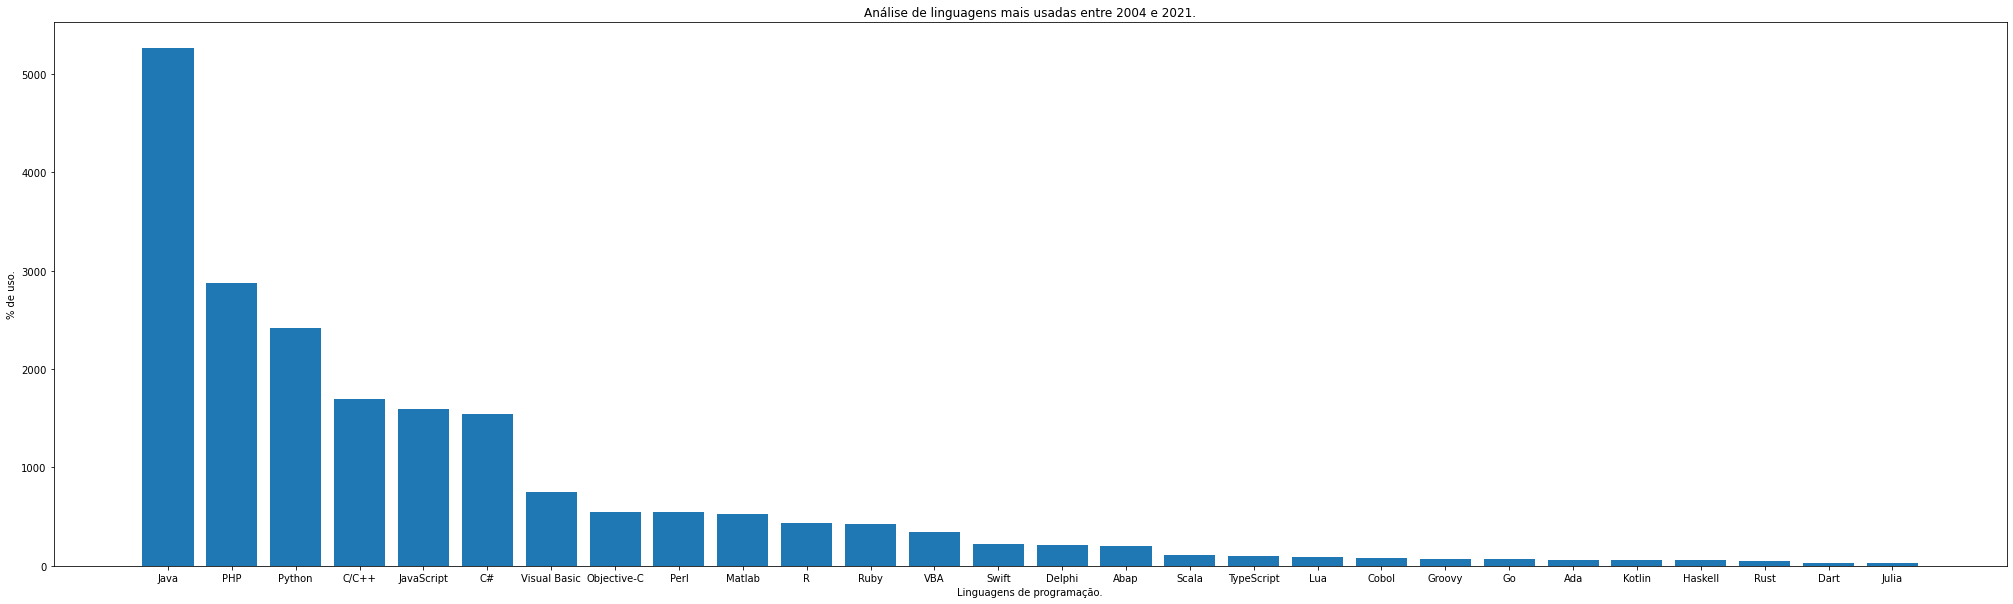

In [91]:
fig, ax = plt.subplots()

ax.set_xticklabels(dados_agrupados['Language'])

ax.bar(x = dados_agrupados['Language'], height = dados_agrupados['Value'])
plt.gcf().set_size_inches(35, 10)
plt.savefig('imgs/Analise Linguagens.png')

configurar_plot_com_dimensoes(
    'Análise de linguagens mais usadas entre 2004 e 2021.',
    'Linguagens de programação.',
    '% de uso.',
    35, 
    10
)

### Verificando correlação entre as variáveis

* Igual a 1 ---------> Correlação linear positiva perfeita
* Maior que 0 -----> Correlação linear positiva
* Igual a 0 ---------> Sem correlação linear
* Menor que 0 ----> Correlação linear negativa
* Igual a -1 --------> Correlação linear negativa perfeita

In [92]:
targets = [
    {
        'linguagem_1': 'Java',
        'linguagem_2': 'JavaScript'
    },
    {
        'linguagem_1': 'Java',
        'linguagem_2': 'Python'
    },
    {
        'linguagem_1': 'JavaScript',
        'linguagem_2': 'Python'
    },
    {
        'linguagem_1': 'JavaScript',
        'linguagem_2': 'TypeScript'
    },
    {
        'linguagem_1': 'Java',
        'linguagem_2': 'C/C++'
    },
    {
        'linguagem_1': 'PHP',
        'linguagem_2': 'JavaScript'
    },
    {
        'linguagem_1': 'PHP',
        'linguagem_2': 'Java'
    },
    {
        'linguagem_1': 'PHP',
        'linguagem_2': 'Python'
    },
    {
        'linguagem_1': 'R',
        'linguagem_2': 'Python'
    },
    {
        'linguagem_1': 'R',
        'linguagem_2': 'JavaScript'
    },
    {
        'linguagem_1': 'R',
        'linguagem_2': 'TypeScript'
    }
]

In [103]:
def verificar_correlacao(linguagem_1, linguagem_2):
    print('Verificando a correlação Pearson entre os % de uso das linguagens: {} e {}.'.format(linguagem_1, linguagem_2))
    corr = df[linguagem_1].corr(df[linguagem_2])
    result = ''
    print(corr)
    if (corr == 1):
        result = 'correlação linear positiva perfeita'
    if (corr > 0):
        result = 'correlação linear positiva'
    if (corr == 0):
        result = 'correlação linear inexistente'
    if (corr == -1):
        result = 'correlação linear negativa perfeita'
    if (corr < 0):
        result = 'correlação linear negativa'
    print('{} e {} possuem {}.\n'.format(linguagem_1, linguagem_2, result))
    
    
def plotar_correlacao(linguagem_1, linguagem_2):
    df.plot.scatter(x = linguagem_1, y = linguagem_2, c = 'Darkblue')

    configurar_plot_com_dimensoes('Correlação entre {} e {}.'.format(linguagem_1, linguagem_2), '', '', 20, 10)
    

Verificando a correlação Pearson entre os % de uso das linguagens: Java e JavaScript.
-0.1759104243423126
Java e JavaScript possuem correlação linear negativa.

Verificando a correlação Pearson entre os % de uso das linguagens: Java e Python.
-0.9815602884038716
Java e Python possuem correlação linear negativa.

Verificando a correlação Pearson entre os % de uso das linguagens: JavaScript e Python.
0.24168739345302312
JavaScript e Python possuem correlação linear positiva.

Verificando a correlação Pearson entre os % de uso das linguagens: JavaScript e TypeScript.
0.4127565560616799
JavaScript e TypeScript possuem correlação linear positiva.

Verificando a correlação Pearson entre os % de uso das linguagens: Java e C/C++.
0.6779880318013292
Java e C/C++ possuem correlação linear positiva.

Verificando a correlação Pearson entre os % de uso das linguagens: PHP e JavaScript.
-0.07984499408856426
PHP e JavaScript possuem correlação linear negativa.

Verificando a correlação Pearson entre 

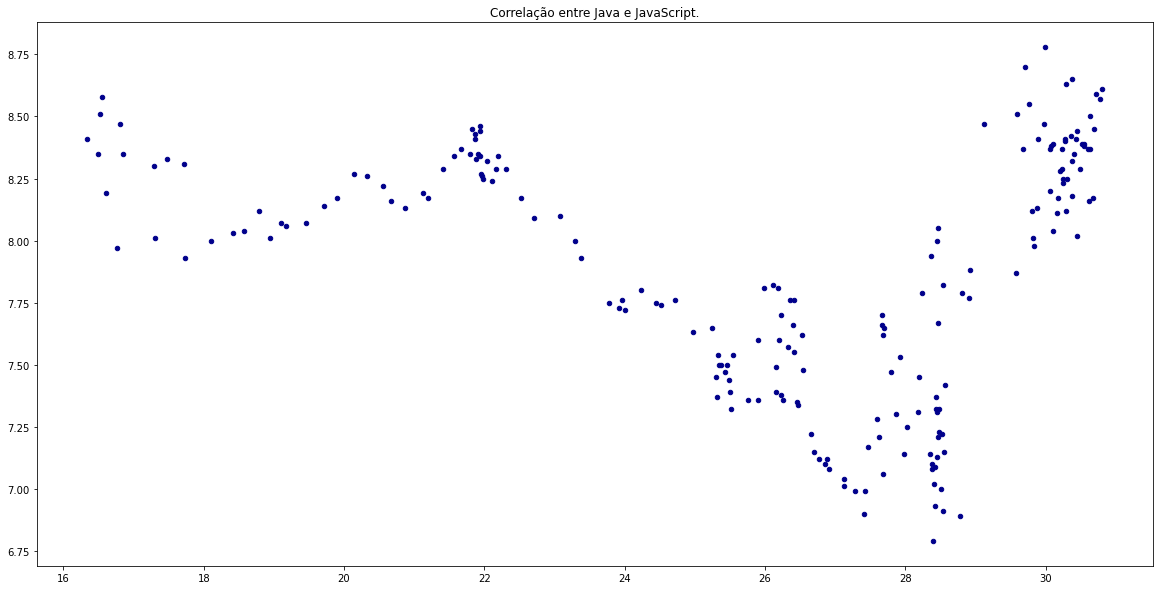

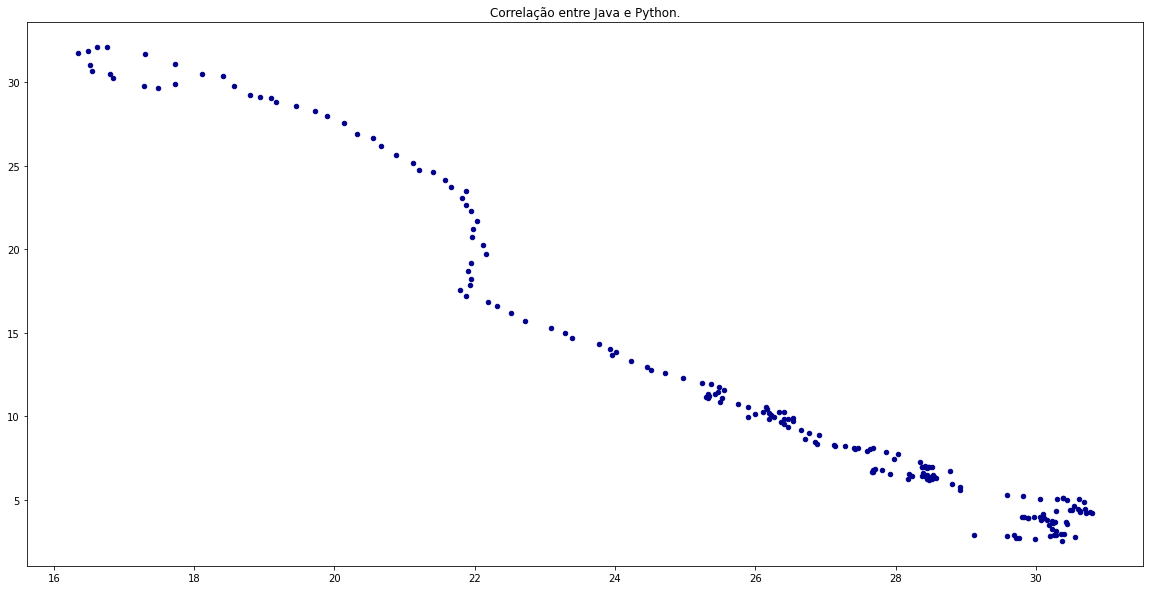

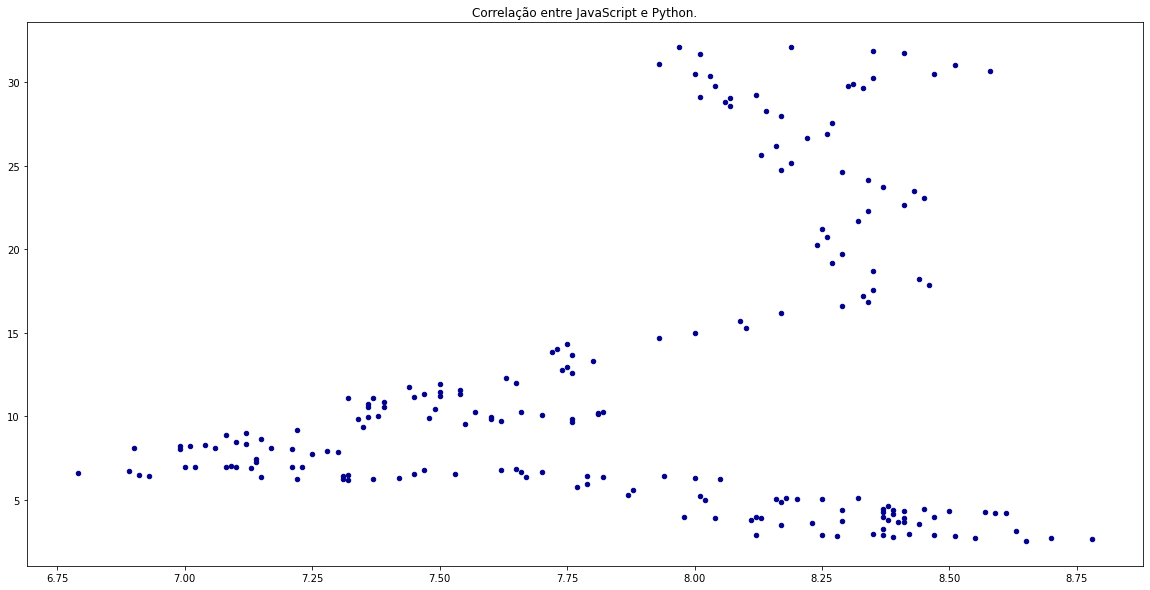

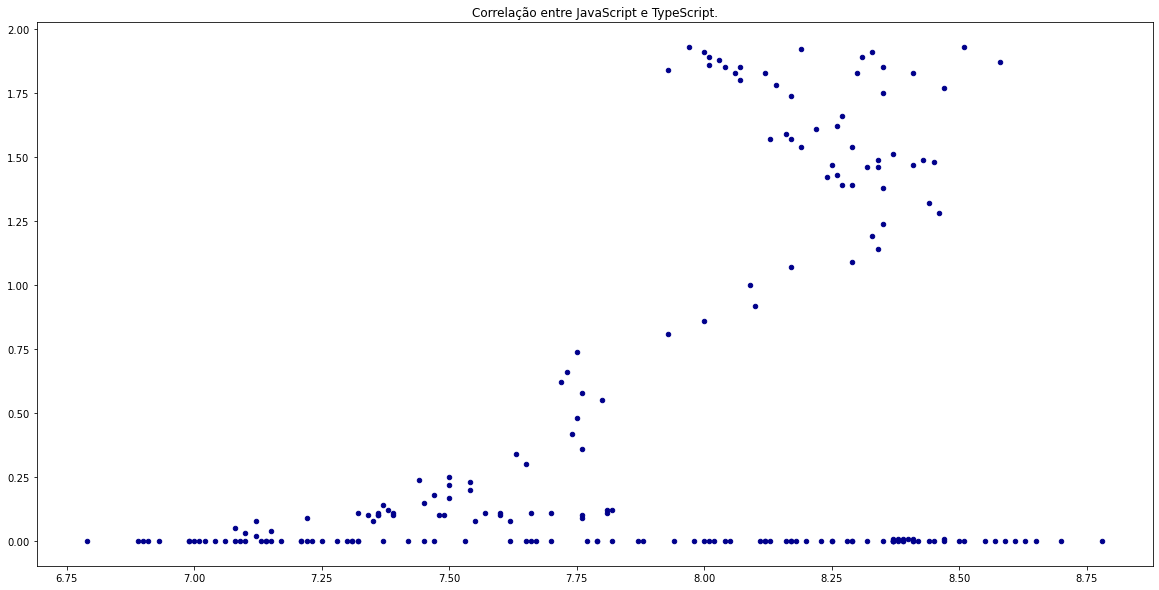

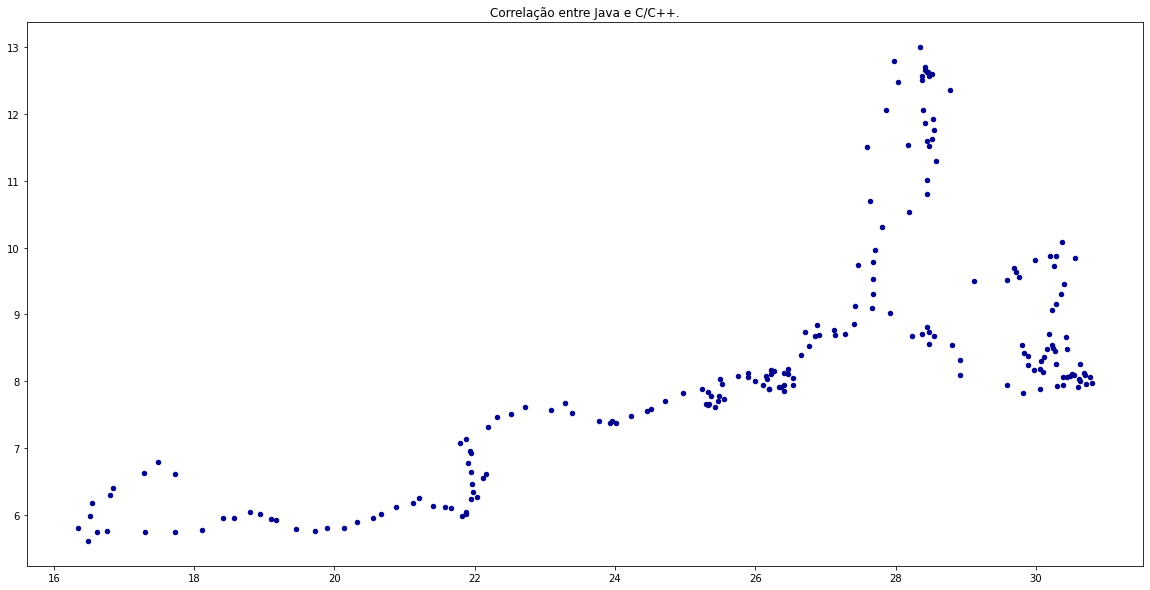

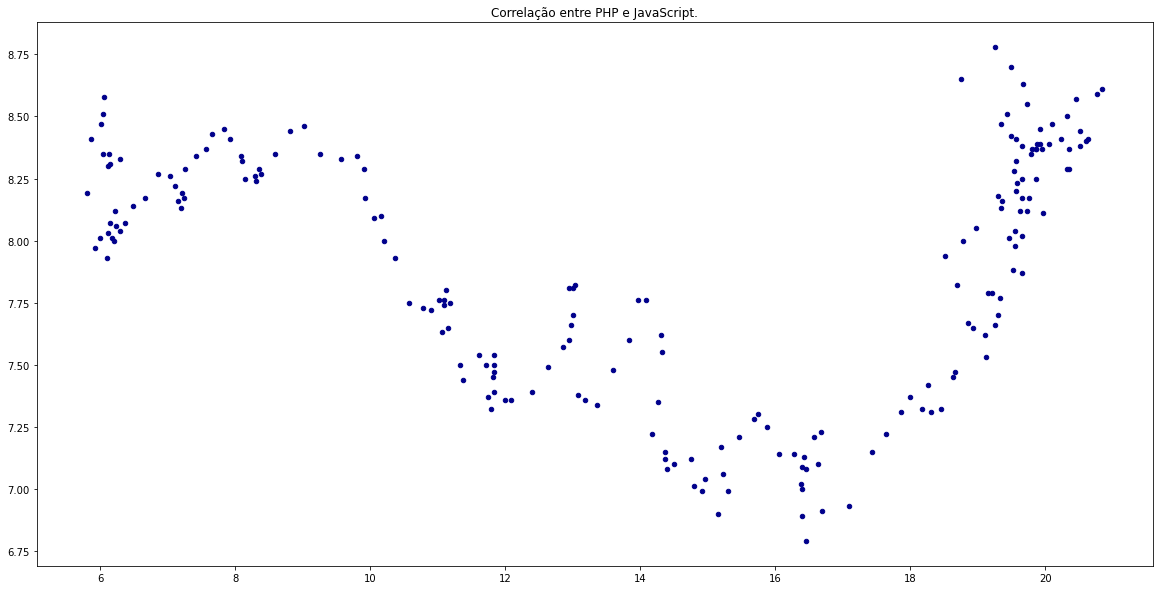

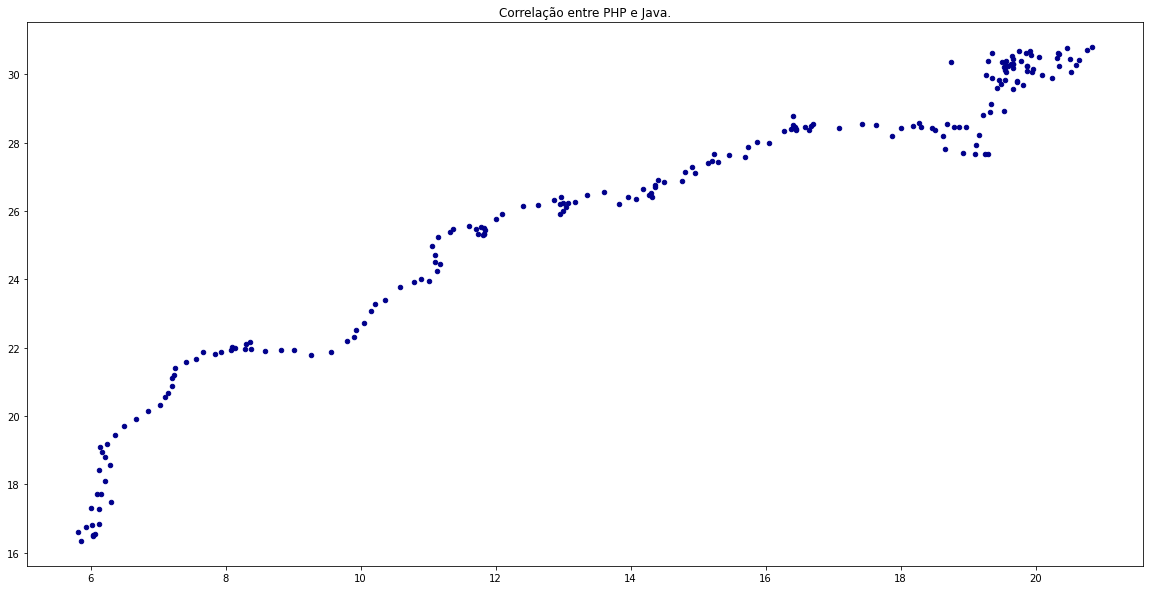

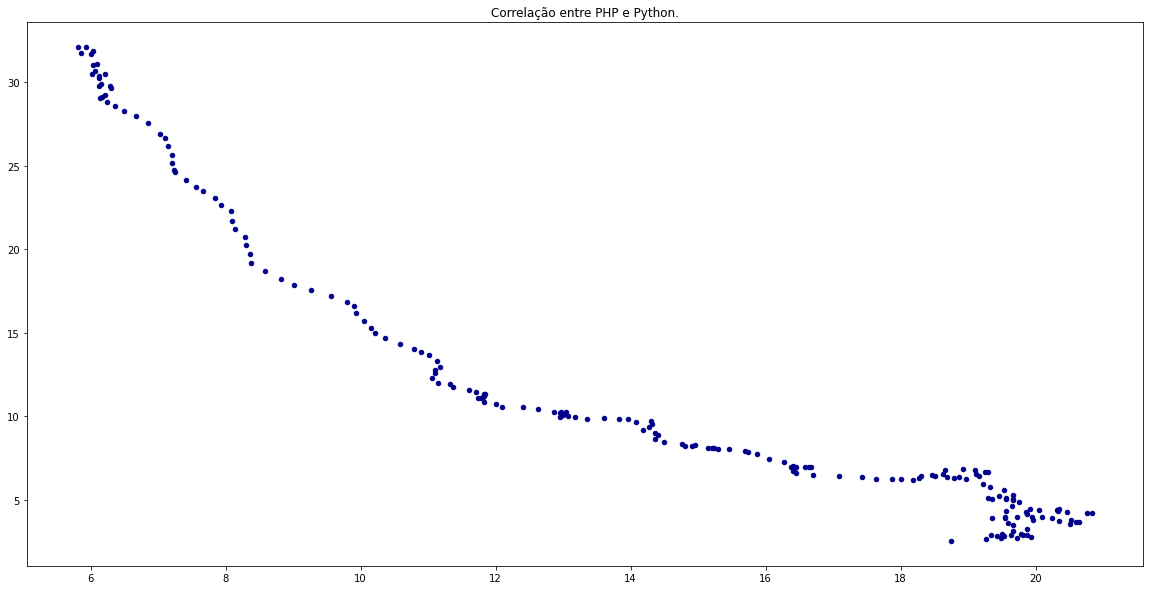

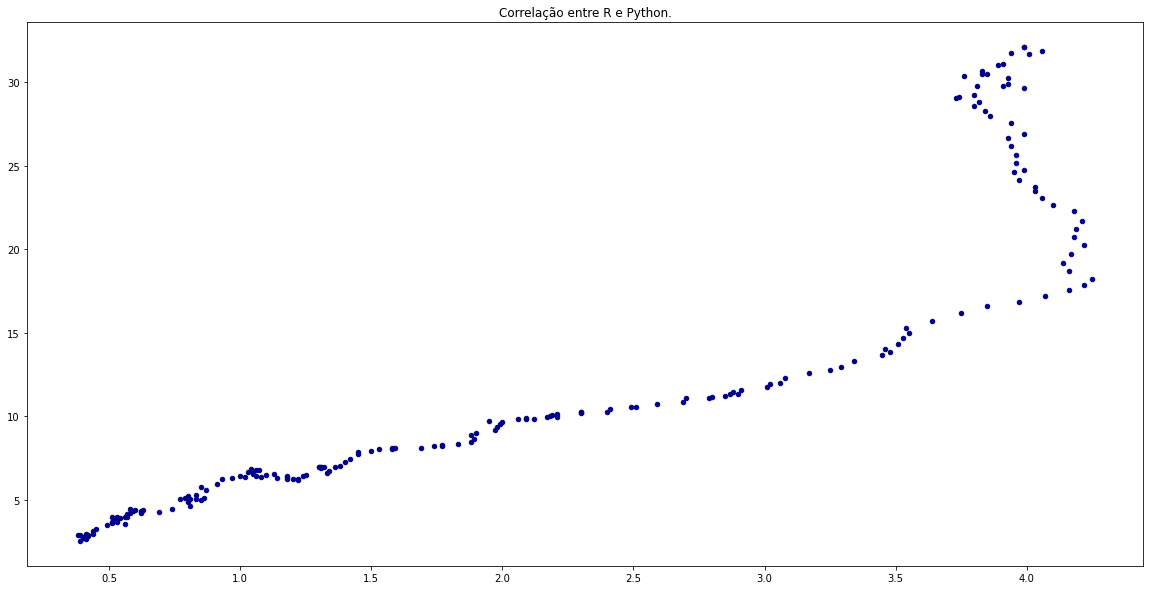

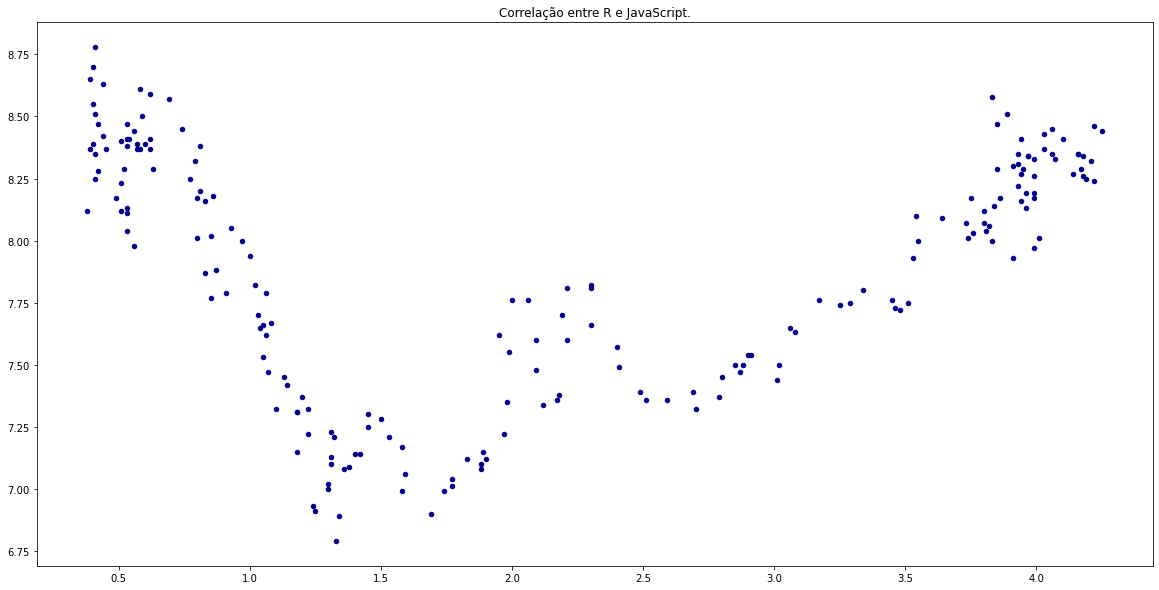

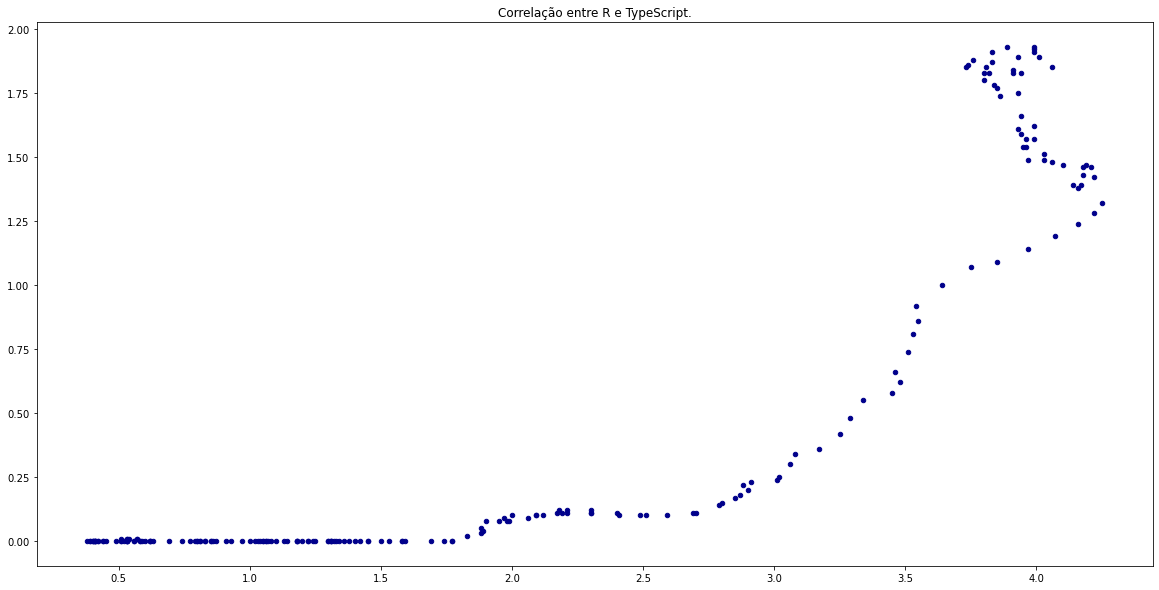

In [101]:
for target in targets:
    verificar_correlacao(target['linguagem_1'], target['linguagem_2'])
    
for target in targets:
    plotar_correlacao(target['linguagem_1'], target['linguagem_2'])

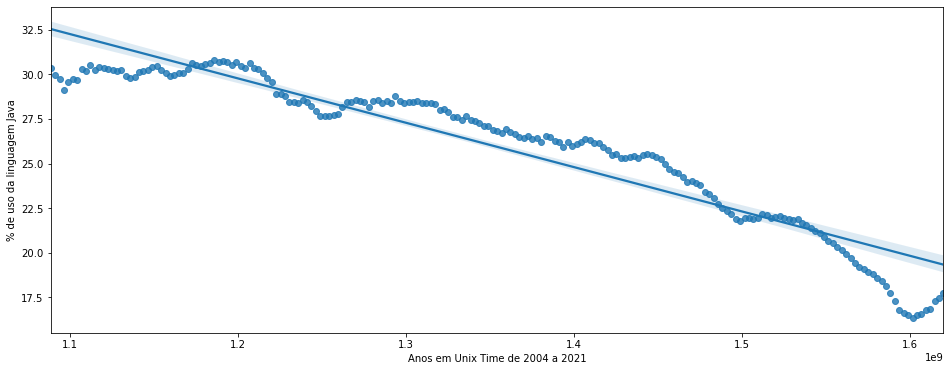

In [106]:
df_java = dados_tratados[dados_tratados['Language'] == 'Java']
sns.regplot(x="UnixTime", y="Value", data= df_java)
plt.gcf().set_size_inches(16, 6)
plt.ylabel('% de uso da linguagem Java')
plt.xlabel('Anos em Unix Time de 2004 a 2021')
plt.show()

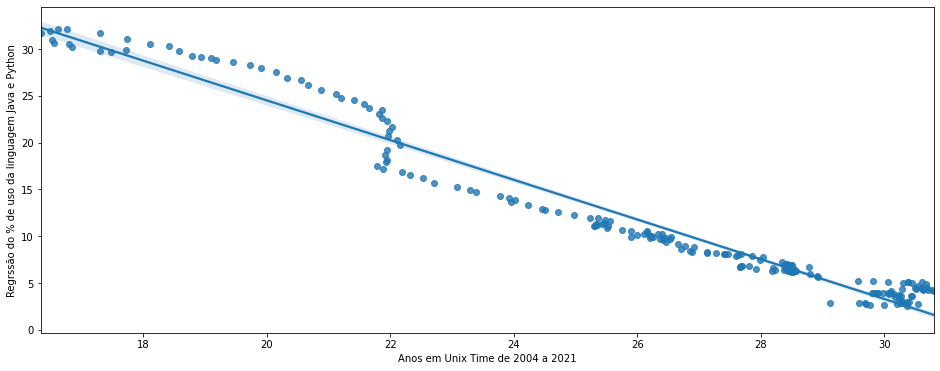

In [110]:
t = df[['Java', 'Python']]
sns.regplot(x="Java", y="Python", data=t)
plt.gcf().set_size_inches(16, 6)
plt.ylabel('Regrssão do % de uso da linguagem Java e Python')
plt.xlabel('Anos em Unix Time de 2004 a 2021')
plt.show()

### Criando os modelos de Machine Learning para o algoritmo de Regressão Linear para as correlações observadas

In [23]:
def prever_regressao_linguagem(linguagem_1, linguagem_2):
    df_linguagem = df[[linguagem_1, linguagem_2]]

    X = df_linguagem[linguagem_1].values.reshape(-1, 1)
    y = df_linguagem[linguagem_2].values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    plt.scatter(X_test, y_test,  color='blue')
    plt.plot(X_test, y_pred, color='red', linewidth=3)

    plt.gcf().set_size_inches(16, 6)

    plt.ylabel('Regressão linear entre % de uso das linguagens {} e {}.'.format(linguagem_1, linguagem_2))
    plt.xlabel('Anos em Unix Time de 2004 a 2021')

    plt.show()

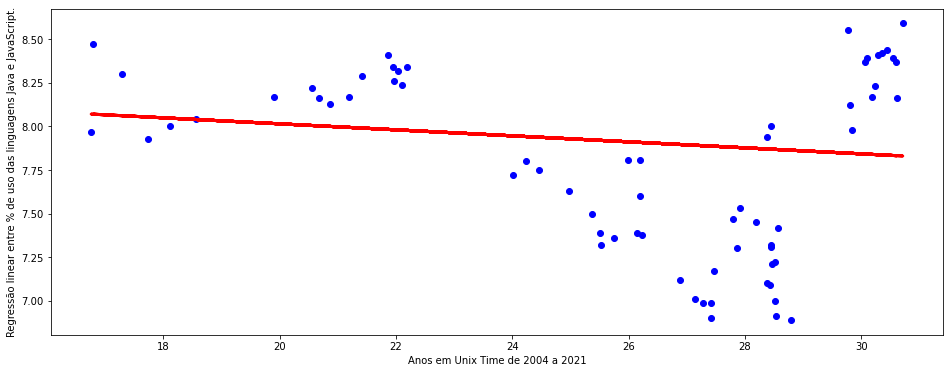

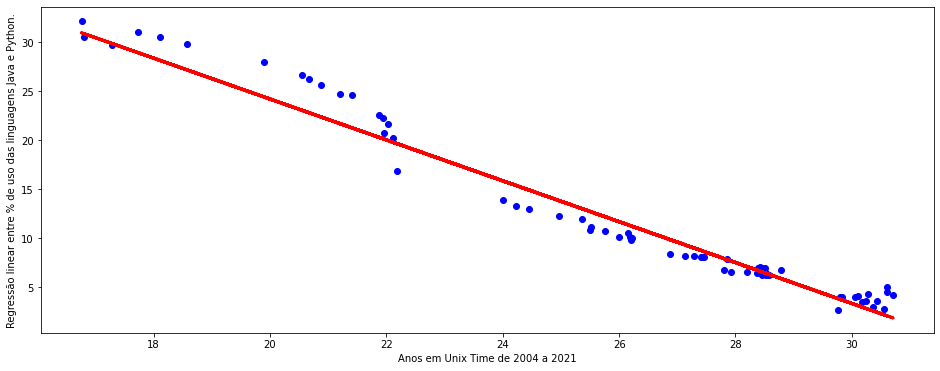

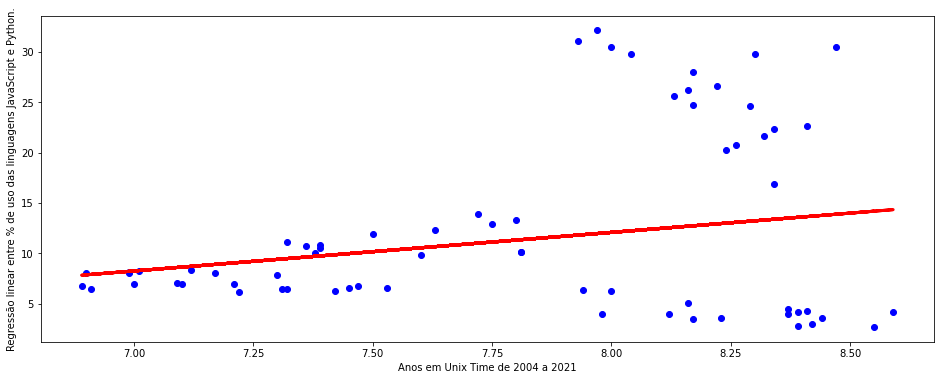

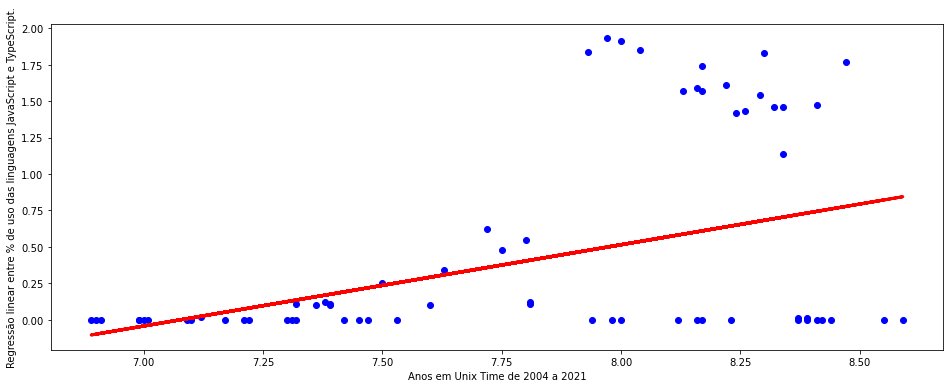

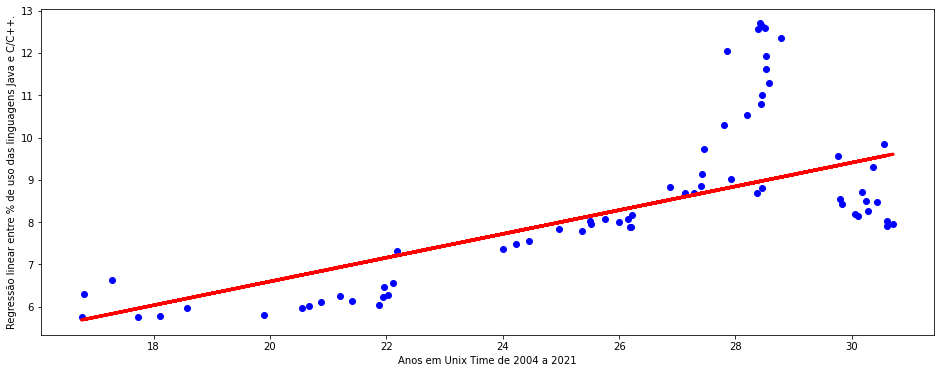

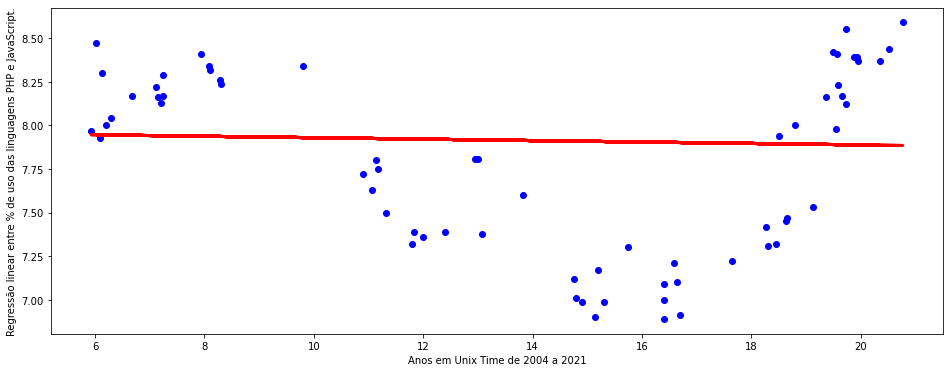

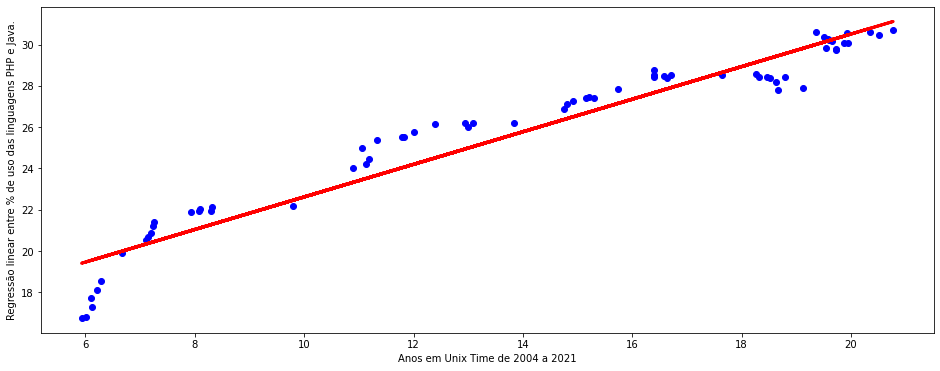

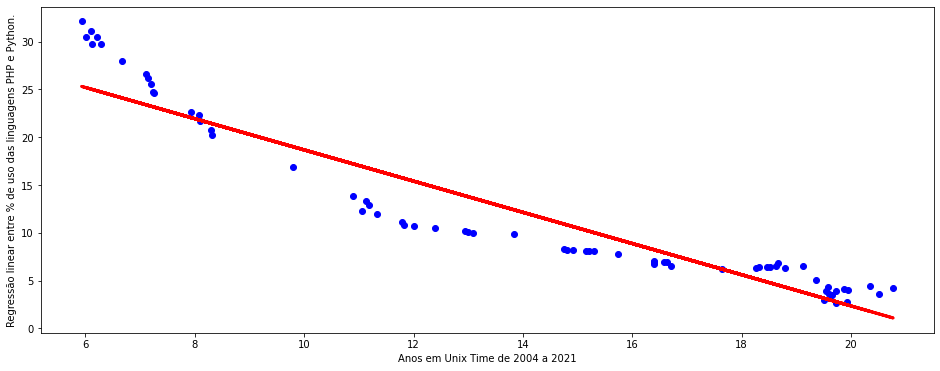

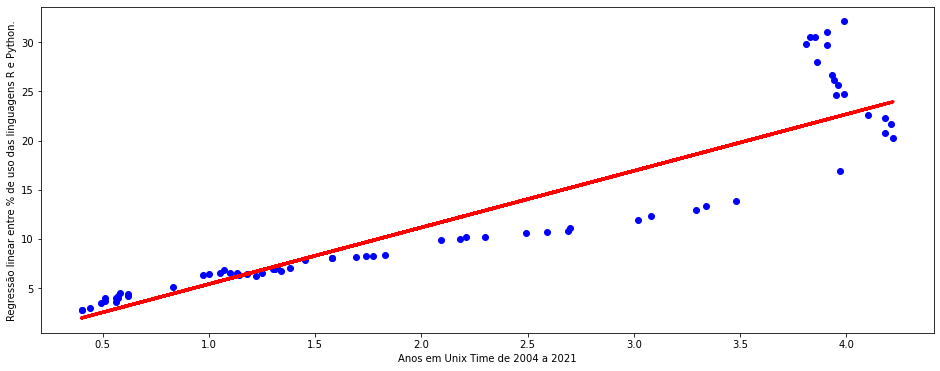

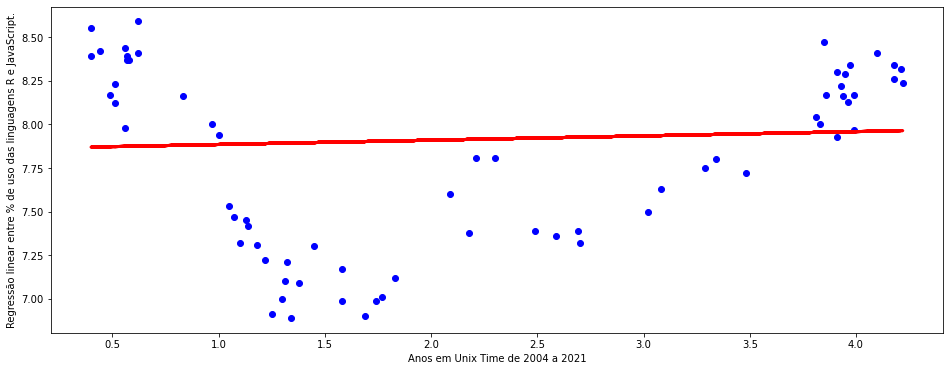

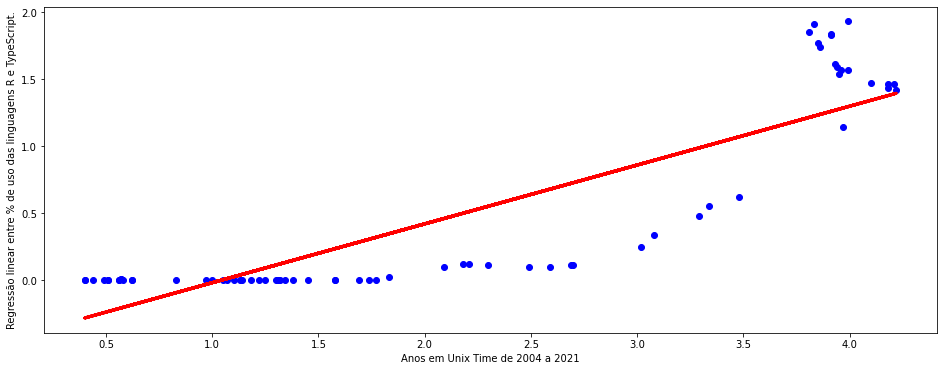

In [24]:
for target in targets:
    prever_regressao_linguagem(target['linguagem_1'], target['linguagem_2'])

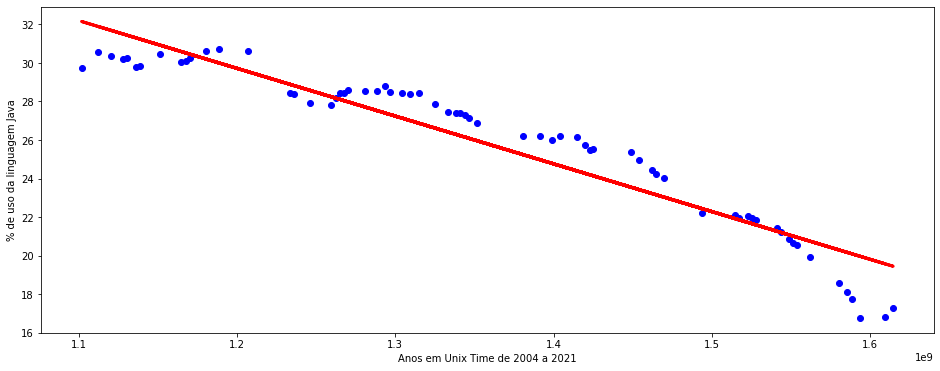

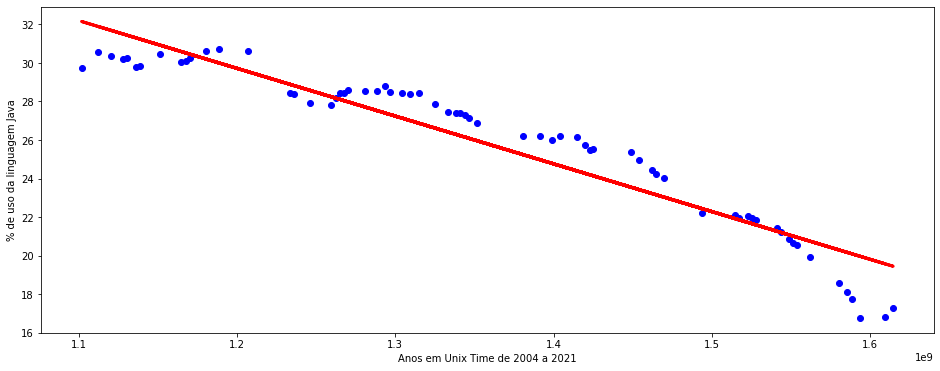

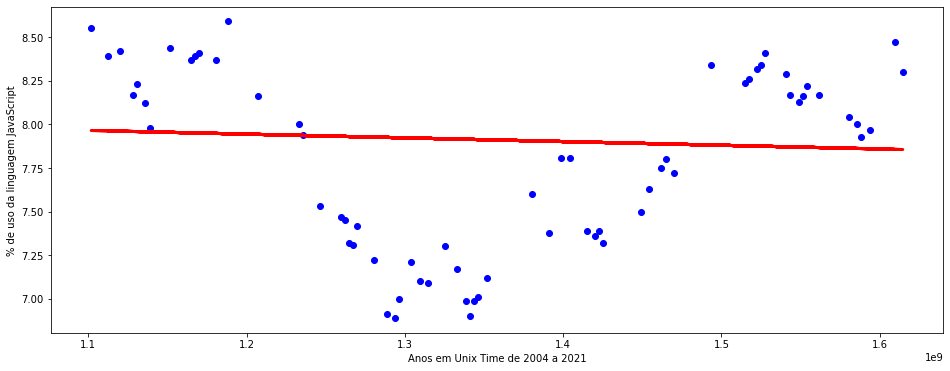

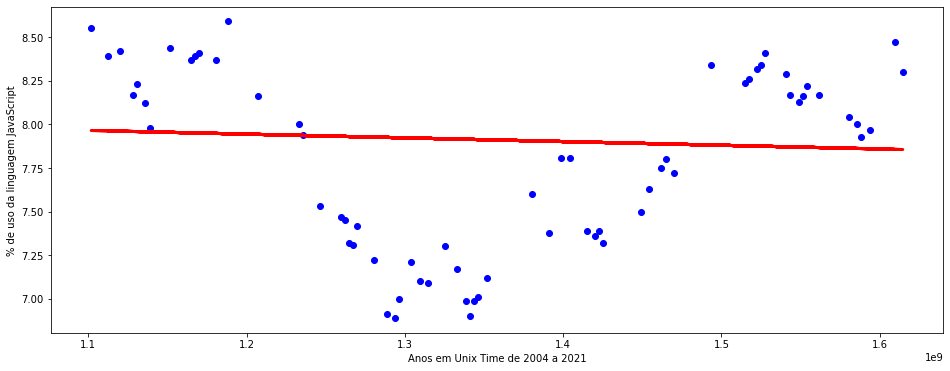

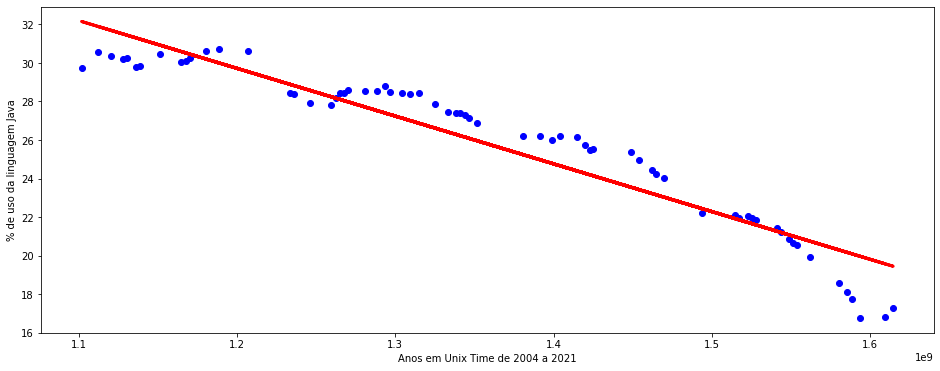

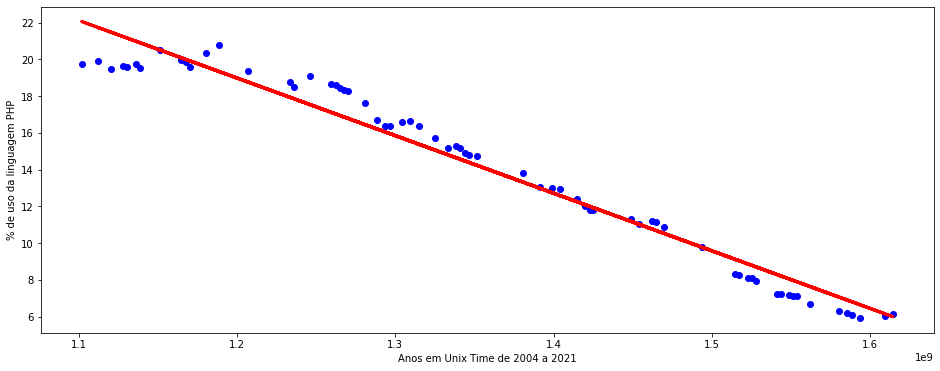

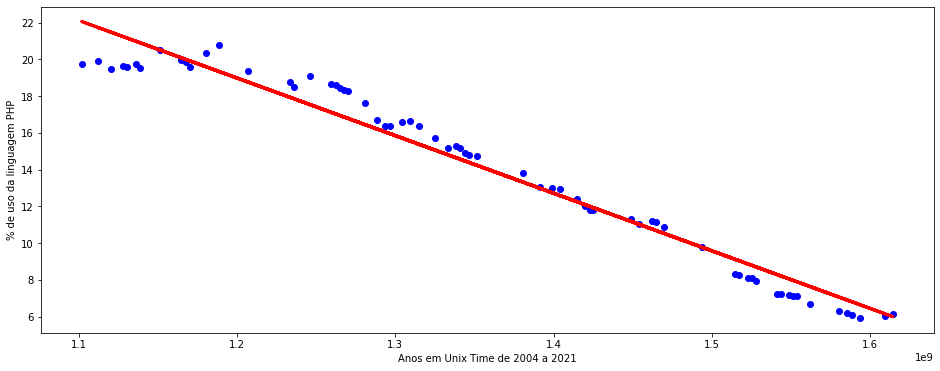

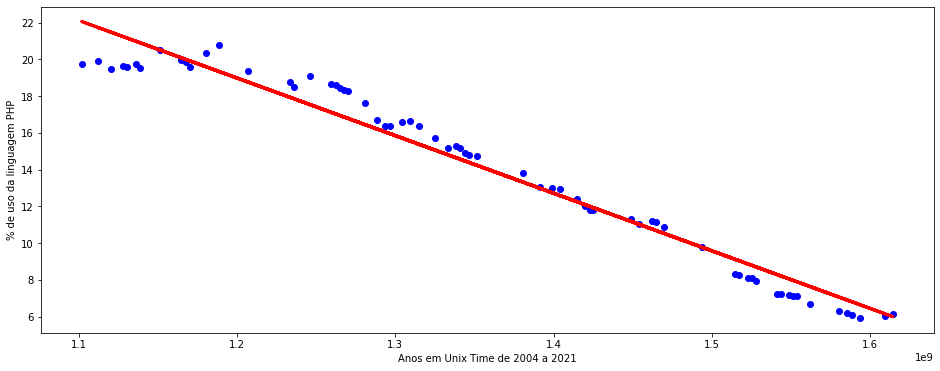

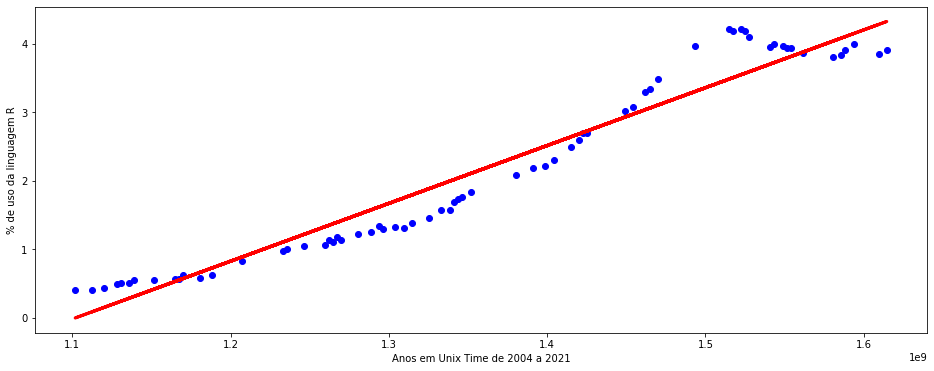

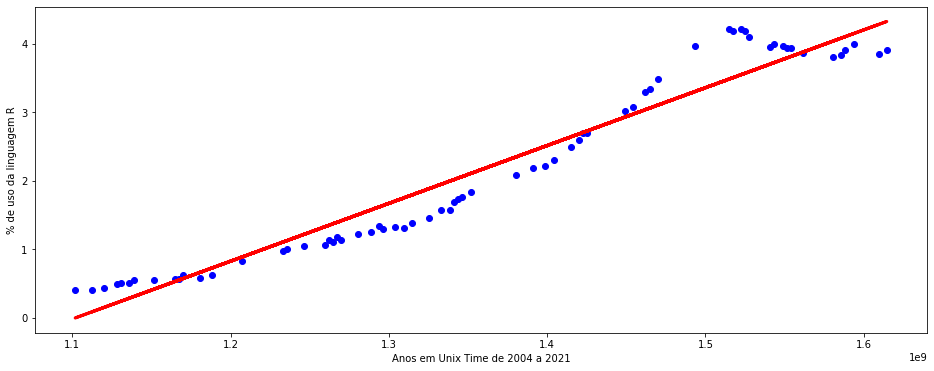

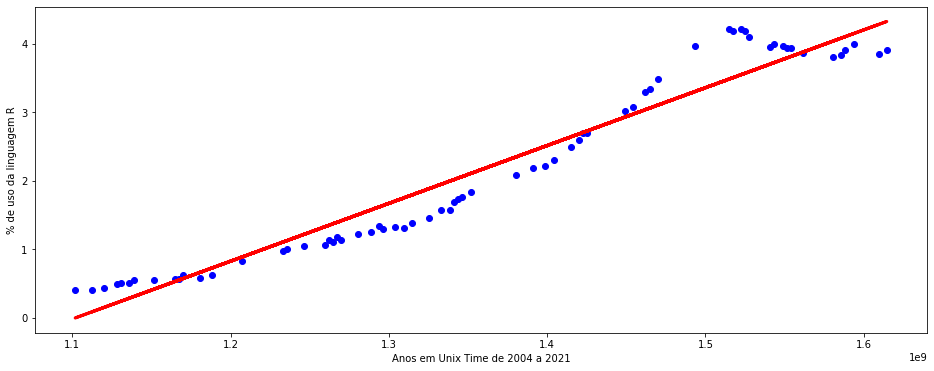

In [25]:
def prever_regressao_linguagem(linguagem):
    df_linguagem = dados_tratados[dados_tratados['Language'] == linguagem]

    X = df_linguagem.UnixTime.values.reshape(-1, 1)
    y = df_linguagem.Value.values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    plt.scatter(X_test, y_test,  color='blue')
    plt.plot(X_test, y_pred, color='red', linewidth=3)

    plt.gcf().set_size_inches(16, 6)

    plt.ylabel('% de uso da linguagem {}'.format(linguagem))
    plt.xlabel('Anos em Unix Time de 2004 a 2021')

    plt.show()

for target in targets:
    prever_regressao_linguagem(target['linguagem_1'])


In [26]:
dados = df
dados.head()

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.08,4.71,0.43,0.0,2.82,0.0,0.03,...,18.75,2.53,0.39,0.33,0.08,0.03,0.0,0.0,1.44,8.56
1,August 2004,0.36,0.36,9.81,4.99,0.46,0.0,2.67,0.0,0.07,...,19.26,2.64,0.41,0.40,0.09,0.03,0.0,0.0,1.46,8.57
2,September 2004,0.41,0.41,9.63,5.06,0.51,0.0,2.65,0.0,0.08,...,19.49,2.72,0.40,0.41,0.10,0.03,0.0,0.0,1.55,8.41
3,October 2004,0.40,0.38,9.50,5.31,0.53,0.0,2.77,0.0,0.09,...,19.34,2.92,0.42,0.46,0.11,0.04,0.0,0.0,1.61,8.49
4,November 2004,0.38,0.38,9.52,5.24,0.55,0.0,2.76,0.0,0.07,...,19.43,2.84,0.41,0.45,0.13,0.04,0.0,0.0,1.50,8.24


In [27]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados.set_index('Date', inplace = True) 

dados.head()

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,Haskell,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
Date,,,,,,,,,,,,,,,,,,,,,
2004-07-01,0.34,0.36,10.08,4.71,0.43,0.0,2.82,0.0,0.03,0.22,...,18.75,2.53,0.39,0.33,0.08,0.03,0.0,0.0,1.44,8.56
2004-08-01,0.36,0.36,9.81,4.99,0.46,0.0,2.67,0.0,0.07,0.20,...,19.26,2.64,0.41,0.40,0.09,0.03,0.0,0.0,1.46,8.57
2004-09-01,0.41,0.41,9.63,5.06,0.51,0.0,2.65,0.0,0.08,0.21,...,19.49,2.72,0.40,0.41,0.10,0.03,0.0,0.0,1.55,8.41
2004-10-01,0.40,0.38,9.50,5.31,0.53,0.0,2.77,0.0,0.09,0.20,...,19.34,2.92,0.42,0.46,0.11,0.04,0.0,0.0,1.61,8.49
2004-11-01,0.38,0.38,9.52,5.24,0.55,0.0,2.76,0.0,0.07,0.24,...,19.43,2.84,0.41,0.45,0.13,0.04,0.0,0.0,1.50,8.24


In [28]:
dados.describe()

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,Haskell,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.498030,0.311478,8.333251,7.603202,0.381034,0.121576,1.055172,0.322906,0.334089,0.298621,...,14.152020,11.917882,2.119803,2.112365,0.246404,0.538867,1.109409,0.470788,1.679015,3.718818
std,0.102097,0.110269,1.807976,1.306233,0.071528,0.149658,0.757032,0.451741,0.137936,0.039728,...,4.983405,8.768295,1.351934,0.707304,0.254726,0.438289,1.387316,0.695970,0.333993,2.206892
min,0.320000,0.170000,5.610000,4.710000,0.250000,0.000000,0.230000,0.000000,0.030000,0.200000,...,5.810000,2.530000,0.380000,0.330000,0.050000,0.010000,0.000000,0.000000,1.100000,0.670000
25%,0.400000,0.230000,7.395000,6.575000,0.320000,0.000000,0.370000,0.000000,0.260000,0.280000,...,9.990000,5.435000,0.855000,1.580000,0.080000,0.150000,0.000000,0.000000,1.440000,1.580000
50%,0.510000,0.300000,8.080000,7.330000,0.370000,0.110000,0.810000,0.080000,0.380000,0.300000,...,14.500000,8.440000,1.880000,2.440000,0.120000,0.410000,0.000000,0.030000,1.610000,3.700000
75%,0.580000,0.360000,8.940000,8.935000,0.430000,0.135000,1.680000,0.505000,0.450000,0.320000,...,19.300000,15.925000,3.685000,2.650000,0.340000,1.000000,2.455000,1.035000,1.780000,5.375000
max,0.720000,0.770000,13.000000,10.000000,0.560000,0.580000,2.820000,1.460000,0.520000,0.390000,...,20.840000,32.110000,4.250000,2.940000,1.140000,1.370000,3.580000,1.930000,2.640000,8.570000


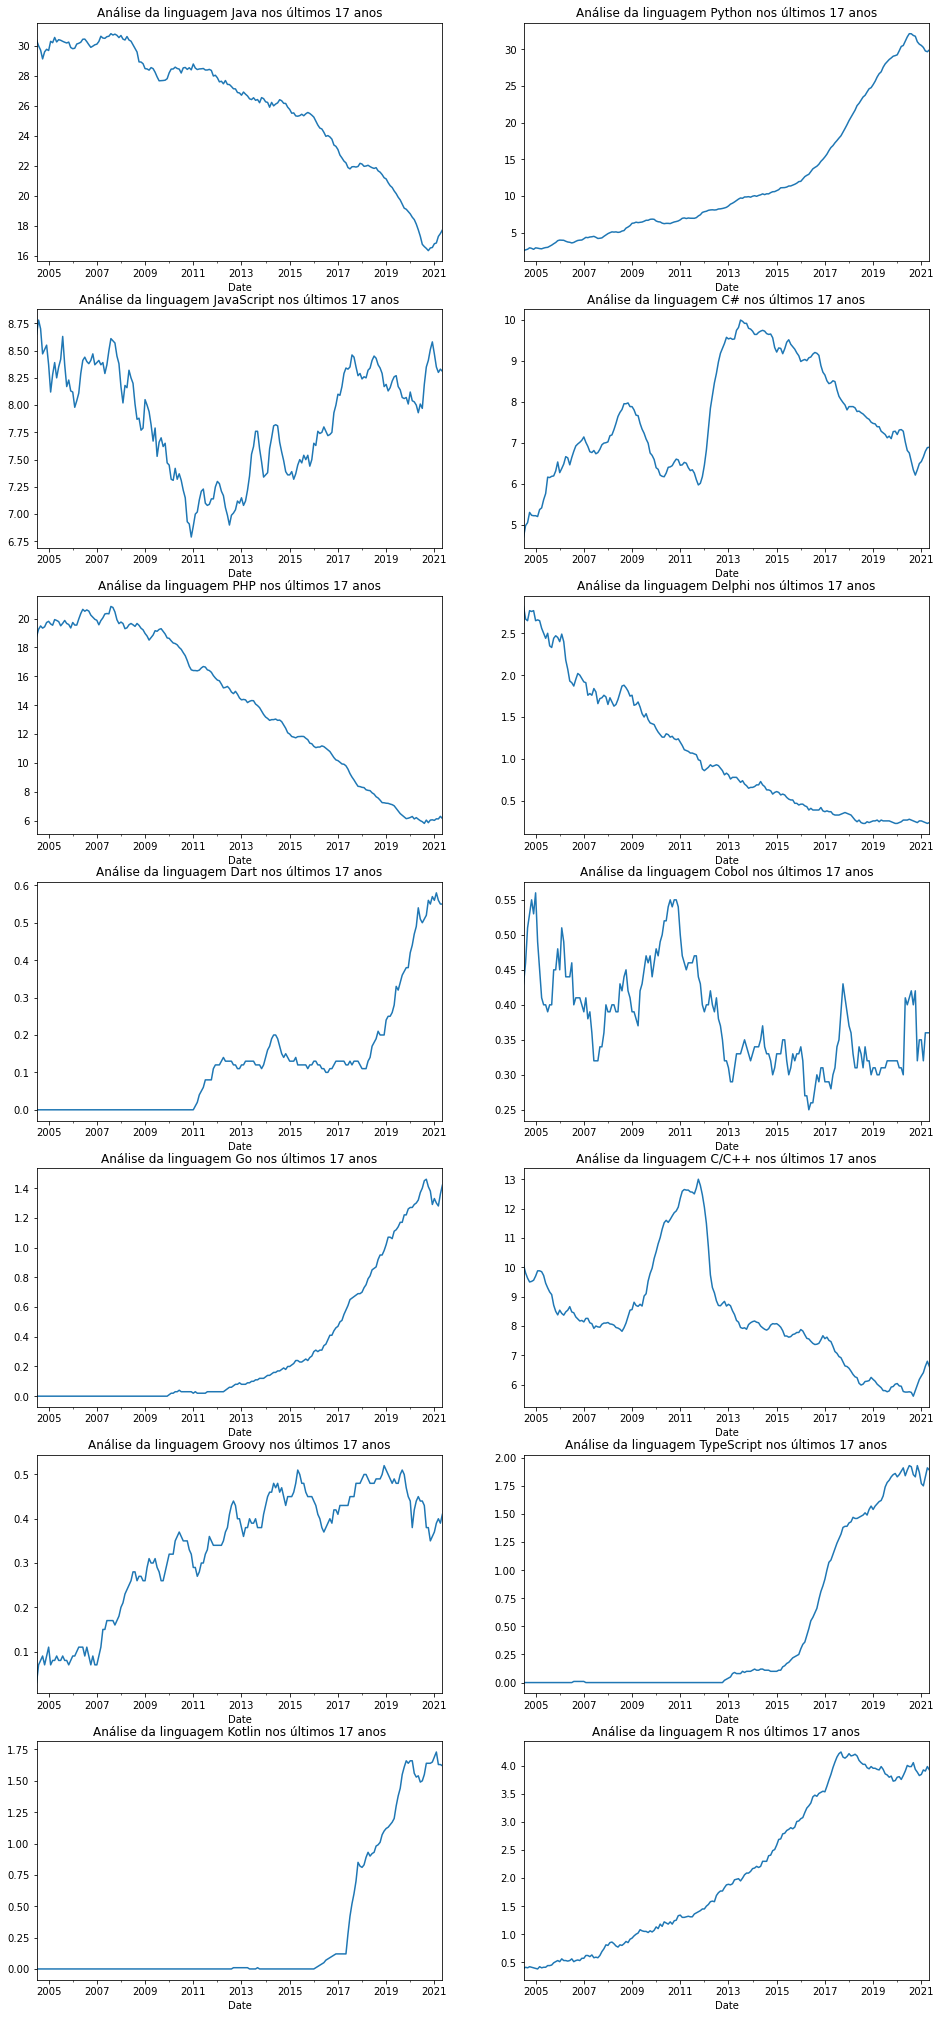

In [130]:
fig, axes = plt.subplots(nrows=7, ncols=2)

dados['Java'].plot(ax=axes[0,0], title = "Análise da linguagem Java nos últimos 17 anos")
dados['JavaScript'].plot(ax=axes[1,0], title = "Análise da linguagem JavaScript nos últimos 17 anos")
dados['Python'].plot(ax=axes[0,1], title = "Análise da linguagem Python nos últimos 17 anos")
dados['C#'].plot(ax=axes[1,1], title = "Análise da linguagem C# nos últimos 17 anos")
dados['PHP'].plot(ax=axes[2,0], title = "Análise da linguagem PHP nos últimos 17 anos")
dados['Delphi'].plot(ax=axes[2,1], title = "Análise da linguagem Delphi nos últimos 17 anos")
dados['Dart'].plot(ax=axes[3,0], title = "Análise da linguagem Dart nos últimos 17 anos")
dados['Cobol'].plot(ax=axes[3,1], title = "Análise da linguagem Cobol nos últimos 17 anos")
dados['Go'].plot(ax=axes[4,0], title = "Análise da linguagem Go nos últimos 17 anos")
dados['C/C++'].plot(ax=axes[4,1], title = "Análise da linguagem C/C++ nos últimos 17 anos")
dados['Groovy'].plot(ax=axes[5,0], title = "Análise da linguagem Groovy nos últimos 17 anos")
dados['TypeScript'].plot(ax=axes[5,1], title = "Análise da linguagem TypeScript nos últimos 17 anos")
dados['Kotlin'].plot(ax=axes[6,0], title = "Análise da linguagem Kotlin nos últimos 17 anos")
dados['R'].plot(ax=axes[6,1], title = "Análise da linguagem R nos últimos 17 anos")

plt.gcf().set_size_inches(16, 36)

plt.savefig('imgs/Comparação linguagens 17 anos')
plt.show()

### Implementando o algoritmo K-Nearest Neighbors

In [30]:
X = dados_agrupados.Value.values.reshape(-1, 1)
y = dados_agrupados.Language.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn.predict(X_test)

array(['Objective-C', 'Groovy', 'Objective-C', 'Groovy', 'C/C++', 'Abap',
       'Cobol', 'Groovy', 'Delphi', 'Abap'], dtype=object)

# Analisando dados de 2017

In [132]:
dados_2017 = pd.read_csv('dados/user-languages.csv')\
    [['user_id', 'java', 'javascript', 'typescript', 'php', 'python', 'c#', 'go']]

dados_2017.head()

,user_id,java,javascript,typescript,php,python,c#,go
0,007lva,0.015326,0.049808,0.000000,0.0,0.010536,0.0000,0.005747
1,06wj,0.000000,0.327881,0.015613,0.0,0.028996,0.0171,0.000000
2,0bserver07,0.000000,0.011375,0.000000,0.0,0.185109,0.0000,0.000000
3,0rca,0.018692,0.000000,0.000000,0.0,0.000000,0.0000,0.000000
4,0x00A,0.000000,0.268152,0.000000,0.0,0.000000,0.0000,0.000000


In [133]:
dados_2017.dtypes

user_id        object
java          float64
javascript    float64
typescript    float64
php           float64
python        float64
c#            float64
go            float64
dtype: object

In [134]:
dados_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17461 entries, 0 to 17460
Data columns (total 8 columns):
user_id       17461 non-null object
java          17461 non-null float64
javascript    17461 non-null float64
typescript    17461 non-null float64
php           17461 non-null float64
python        17461 non-null float64
c#            17461 non-null float64
go            17461 non-null float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [135]:
dados_2017.describe()

,java,javascript,typescript,php,python,c#,go
count,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000
mean,0.028533,0.108883,0.004245,0.017286,0.042778,0.007451,0.012977
std,0.076522,0.122673,0.021715,0.055088,0.088514,0.040868,0.043427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.010870,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.067114,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.016990,0.174345,0.000000,0.001043,0.042476,0.000000,0.000000
max,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000


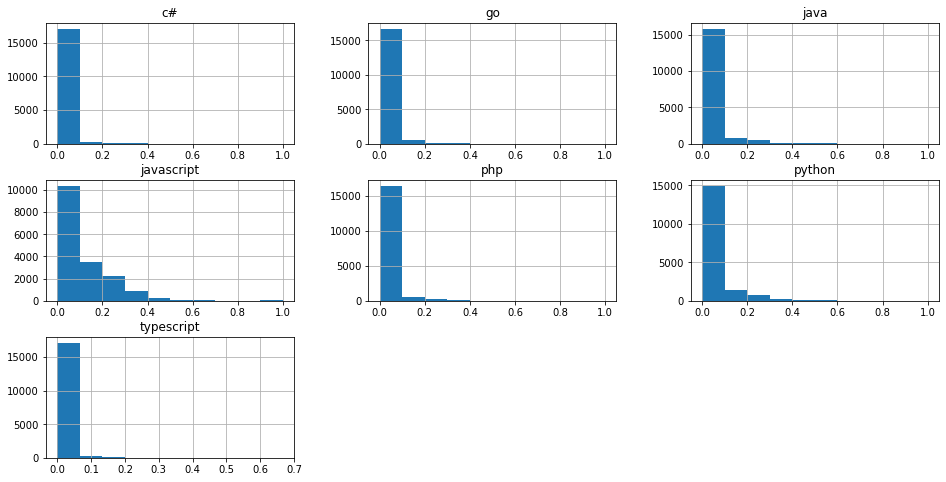

In [136]:
dados_2017.hist()
configurar_plot('', '', 'Histograma das linguagens a serem analisadas')

In [137]:
dft = pd.DataFrame(
    {
        'Language': list(map(lambda i: i, dados_2017.columns[1:])),
        'Value':    list(map(lambda i: dados_2017[i].sum(), dados_2017.columns[1:]))
    }
)

dft.head()

,Language,Value
0,java,498.222018
1,javascript,1901.207143
2,typescript,74.127341
3,php,301.829051
4,python,746.939461


In [138]:
dft.describe()

,Value
count,7.000000
mean,554.144057
std,637.189883
min,74.127341
25%,178.341690
50%,301.829051
75%,622.580740
max,1901.207143


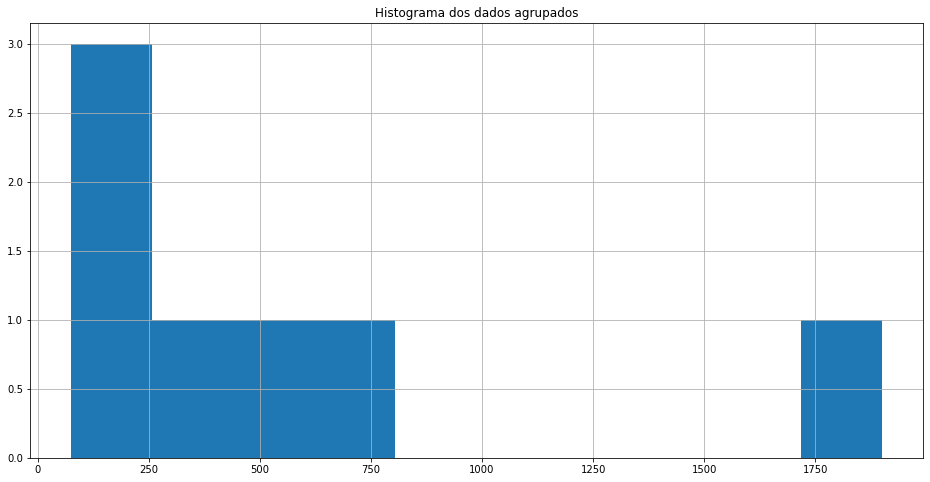

In [139]:
dft.hist()
configurar_plot('Histograma dos dados agrupados', '', '')

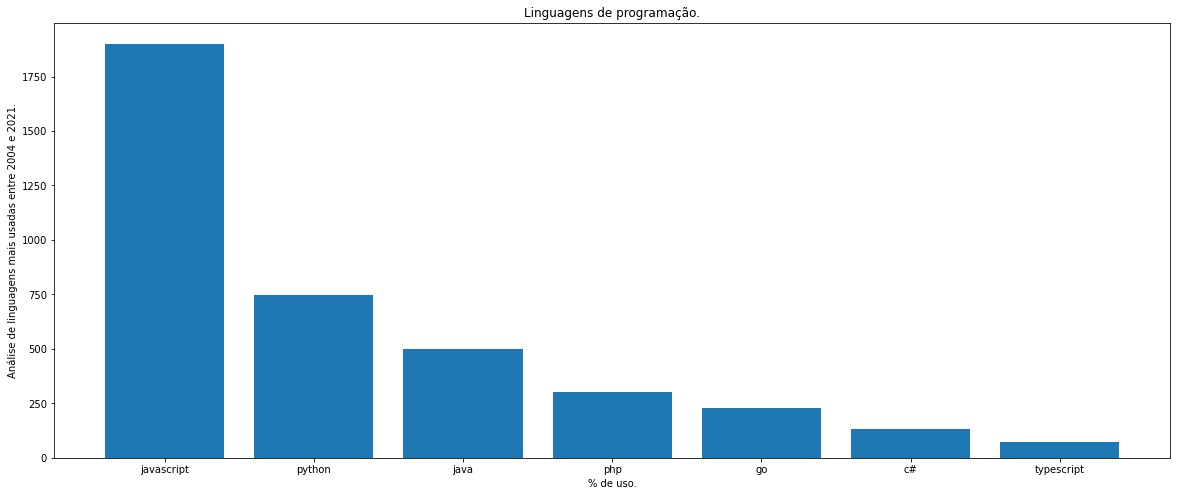

In [140]:
dft = dft.sort_values(by=['Value'], ascending=False)

fig, ax = plt.subplots()

ax.set_xticklabels(dft['Language'])

ax.bar(x = dft['Language'], height = dft['Value'])

plt.gcf().set_size_inches(35, 10)

plt.savefig('imgs/Analise Linguagens Dataset 02.png')

configurar_plot_com_dimensoes(
    'Linguagens de programação.',
    '% de uso.',
    'Análise de linguagens mais usadas entre 2004 e 2021.',
    20, 
    8
)

In [141]:
targets = [
    {
        'linguagem_1': 'java',
        'linguagem_2': 'javascript'
    },
    
    {
        'linguagem_1': 'java',
        'linguagem_2': 'python'
    },
    {
        'linguagem_1': 'javascript',
        'linguagem_2': 'python'
    },
    {
        'linguagem_1': 'javascript',
        'linguagem_2': 'typescript'
    },
    {
        'linguagem_1': 'java',
        'linguagem_2': 'php'
    },
    {
        'linguagem_1': 'java',
        'linguagem_2': 'c#'
    },
    {
        'linguagem_1': 'php',
        'linguagem_2': 'python'
    },
    {
        'linguagem_1': 'php',
        'linguagem_2': 'javascript'
    }
]

Verificando a correlação Pearson entre os % de uso das linguagens: java e javascript.
-0.19341412138059294
java e javascript possuem correlação linear negativa.

Verificando a correlação Pearson entre os % de uso das linguagens: java e python.
-0.0679272004455616
java e python possuem correlação linear negativa.

Verificando a correlação Pearson entre os % de uso das linguagens: javascript e python.
-0.2122198553761165
javascript e python possuem correlação linear negativa.

Verificando a correlação Pearson entre os % de uso das linguagens: javascript e typescript.
0.04626619040646336
javascript e typescript possuem correlação linear positiva.

Verificando a correlação Pearson entre os % de uso das linguagens: java e php.
-0.07461796891834088
java e php possuem correlação linear negativa.

Verificando a correlação Pearson entre os % de uso das linguagens: java e c#.
-0.03668505222036968
java e c# possuem correlação linear negativa.

Verificando a correlação Pearson entre os % de uso da

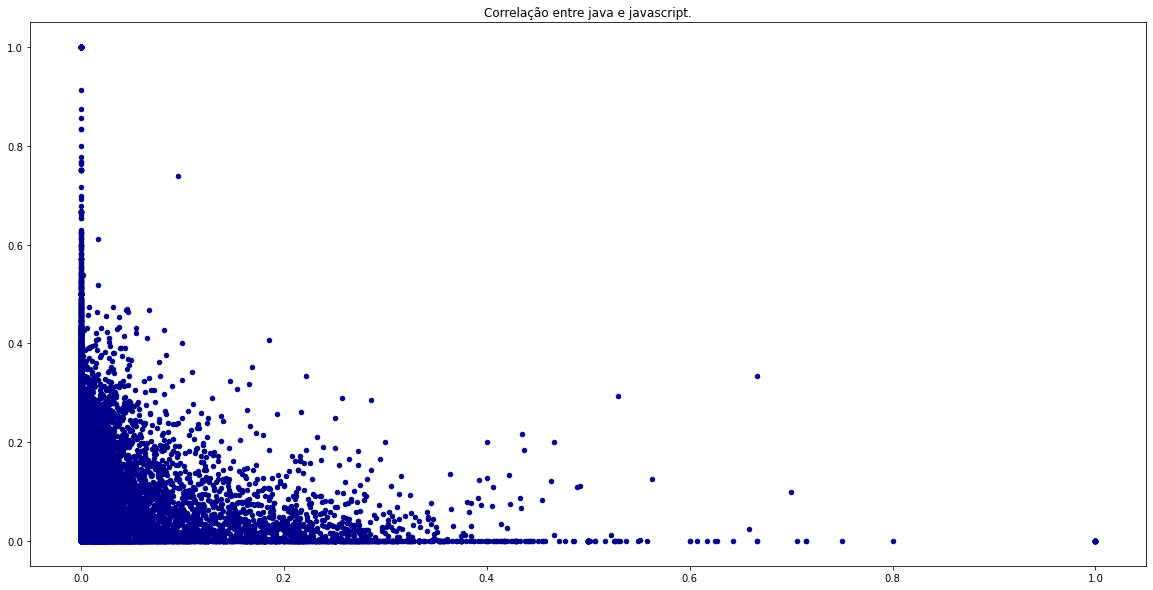

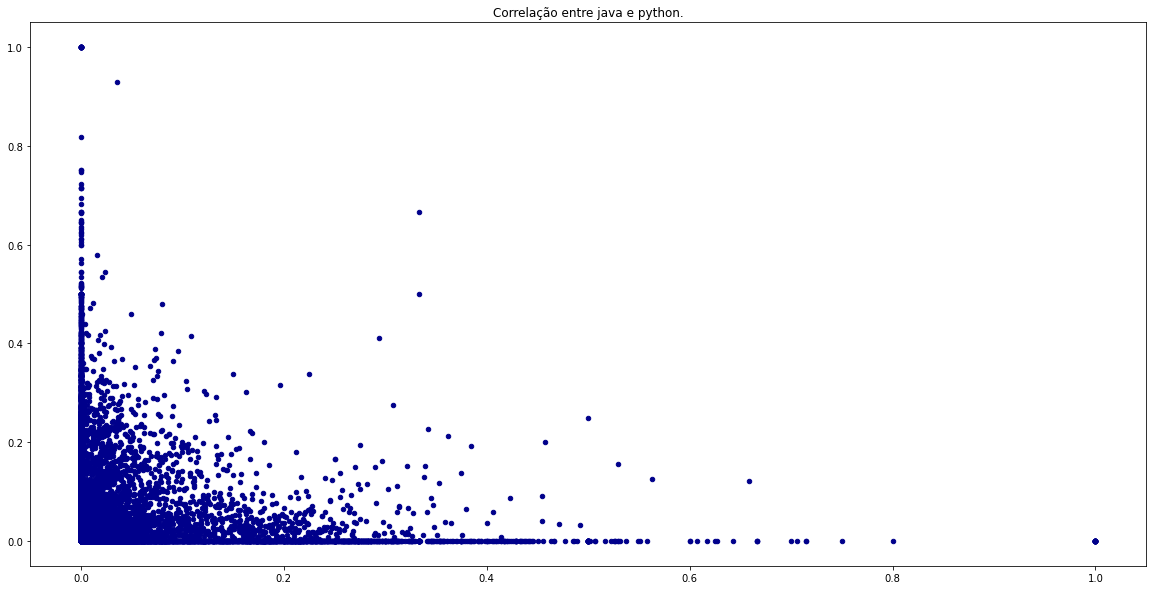

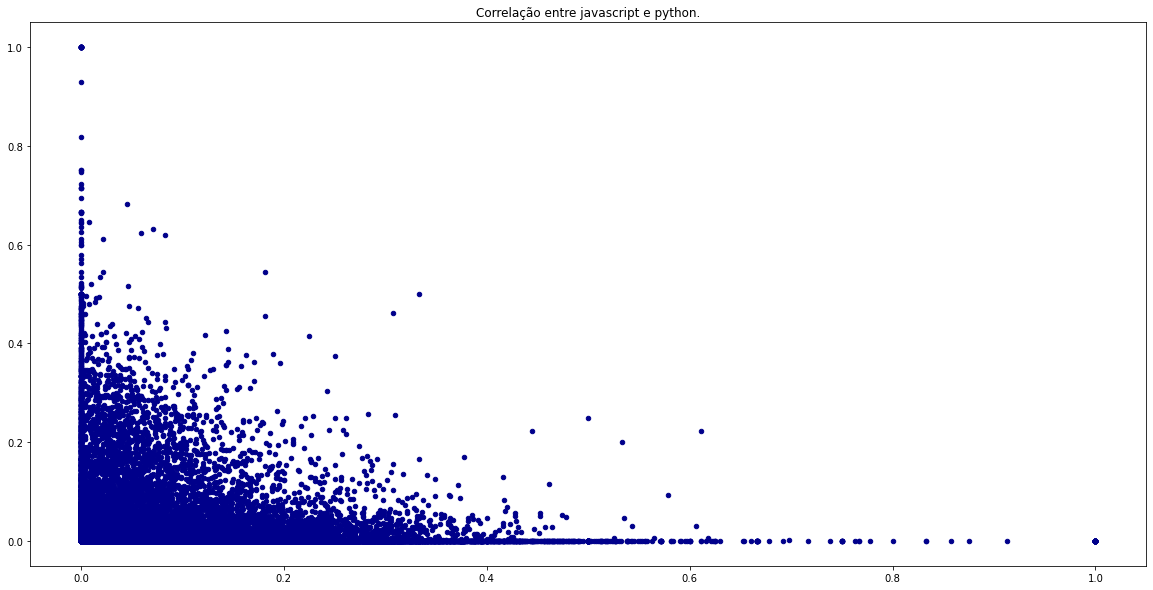

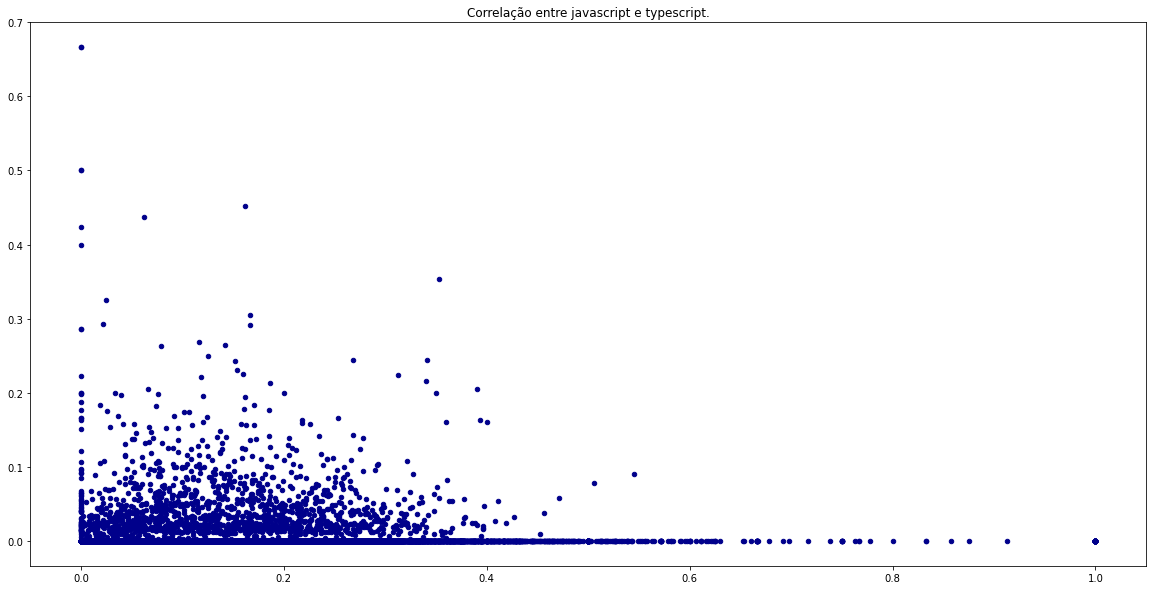

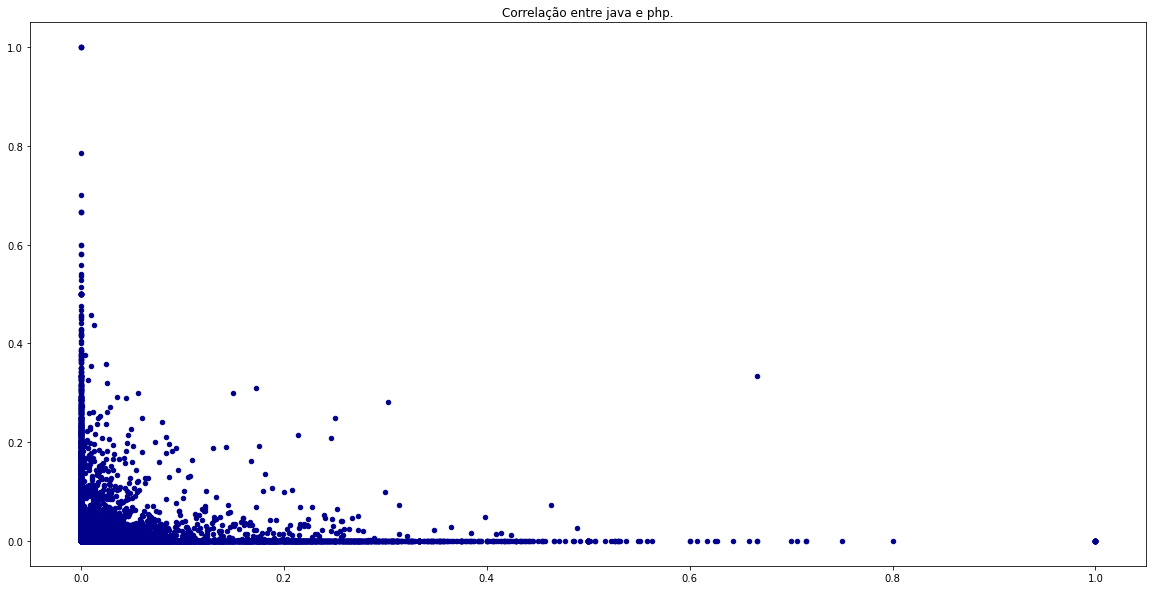

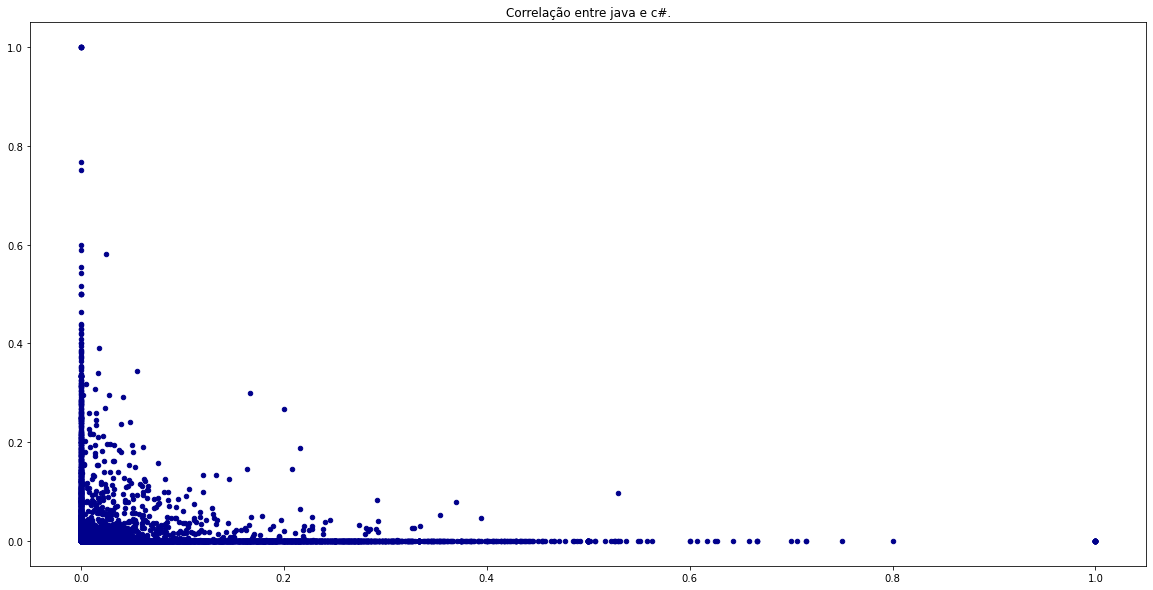

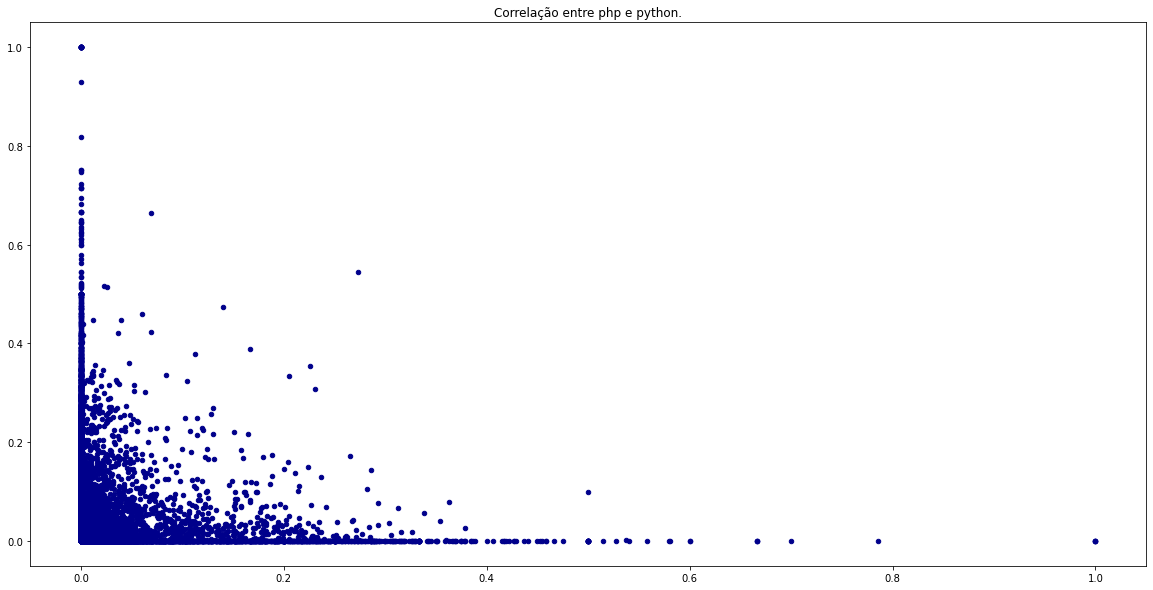

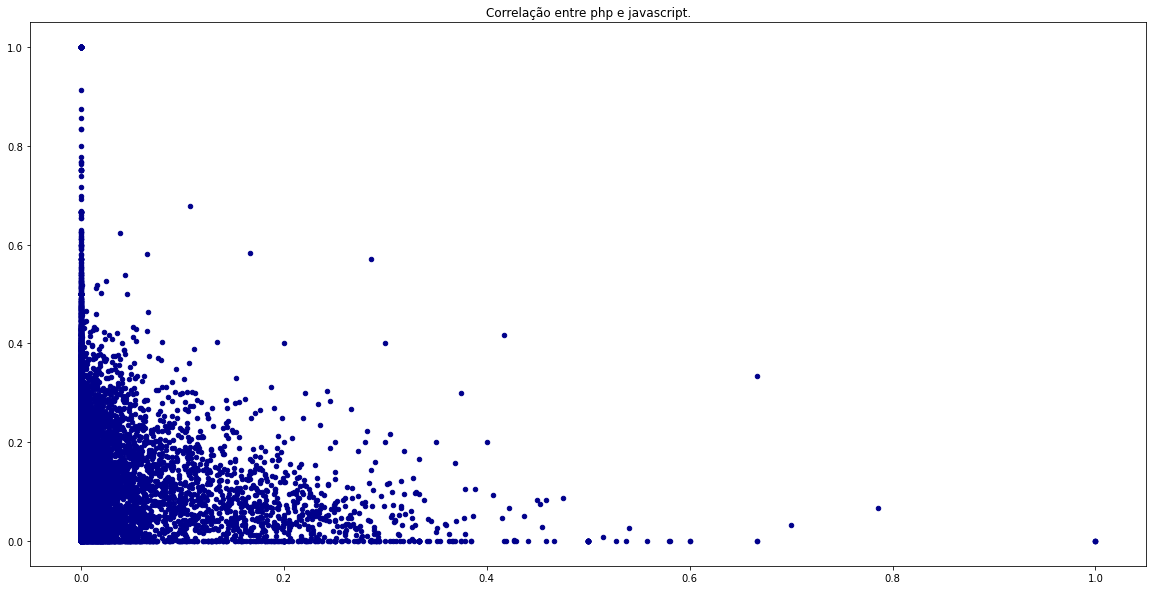

In [143]:
def verificar_correlacao(linguagem_1, linguagem_2):
    print('Verificando a correlação Pearson entre os % de uso das linguagens: {} e {}.'.format(linguagem_1, linguagem_2))
    corr = dados_2017[linguagem_1].corr(dados_2017[linguagem_2])
    result = ''
    print(corr)
    if (corr == 1):
        result = 'correlação linear positiva perfeita'
    if (corr > 0):
        result = 'correlação linear positiva'
    if (corr == 0):
        result = 'correlação linear inexistente'
    if (corr == -1):
        result = 'correlação linear negativa perfeita'
    if (corr < 0):
        result = 'correlação linear negativa'
    print('{} e {} possuem {}.\n'.format(linguagem_1, linguagem_2, result))
    
    
def plotar_correlacao(linguagem_1, linguagem_2):
    dados_2017.plot.scatter(x = linguagem_1, y = linguagem_2, c = 'Darkblue')

    configurar_plot_com_dimensoes('Correlação entre {} e {}.'.format(linguagem_1, linguagem_2), '', '', 20, 10)

for target in targets:
    verificar_correlacao(target['linguagem_1'], target['linguagem_2'])
    
for target in targets:
    plotar_correlacao(target['linguagem_1'], target['linguagem_2'])

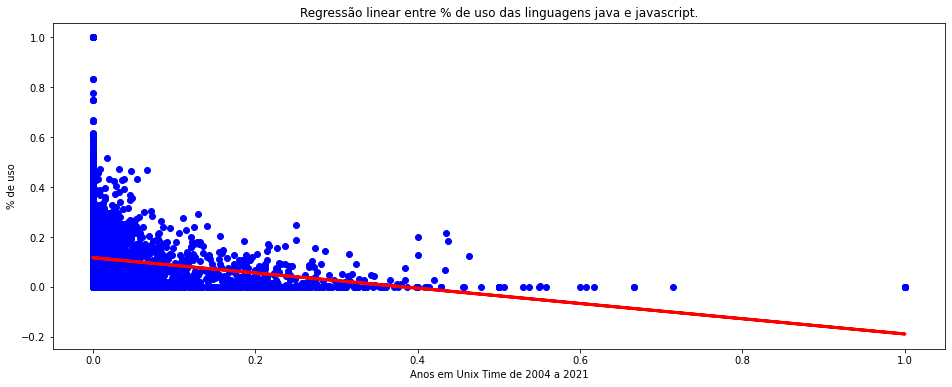

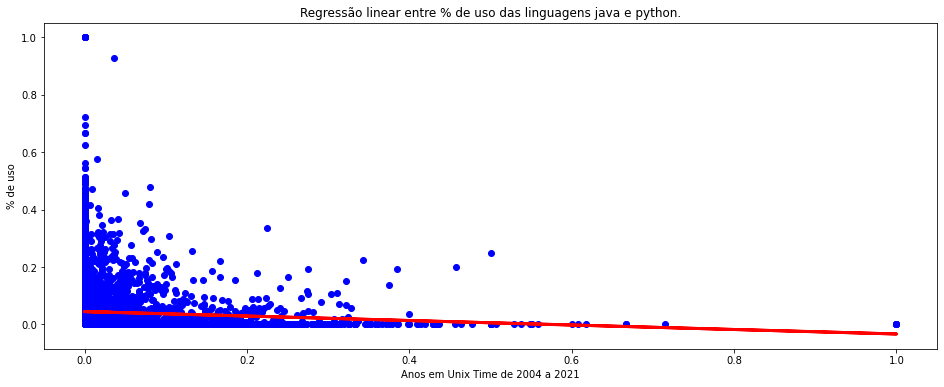

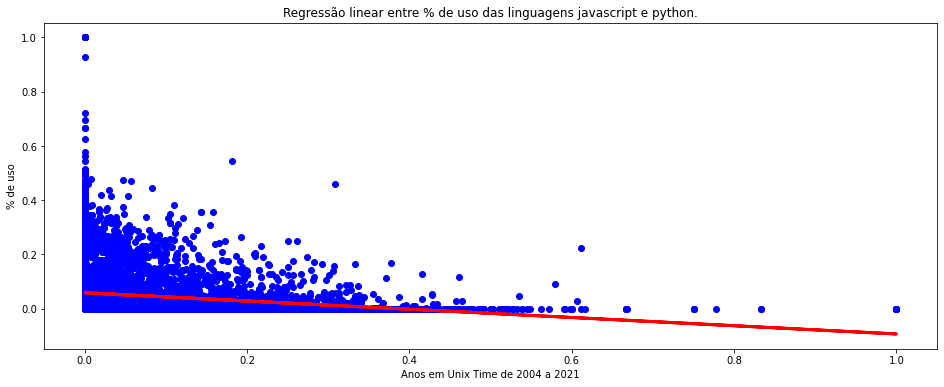

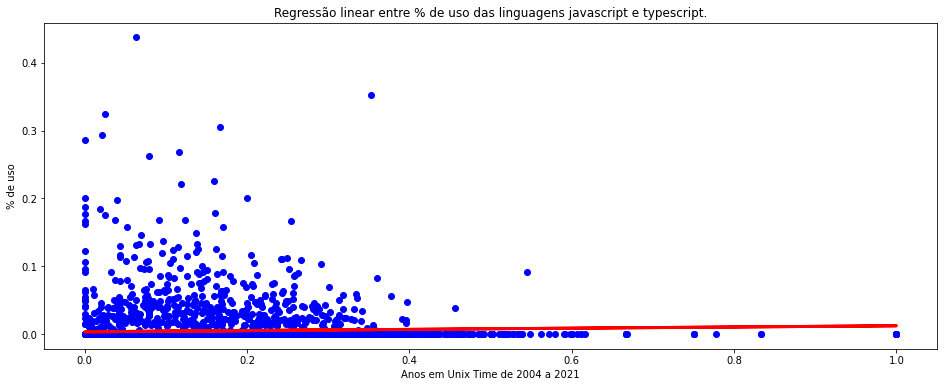

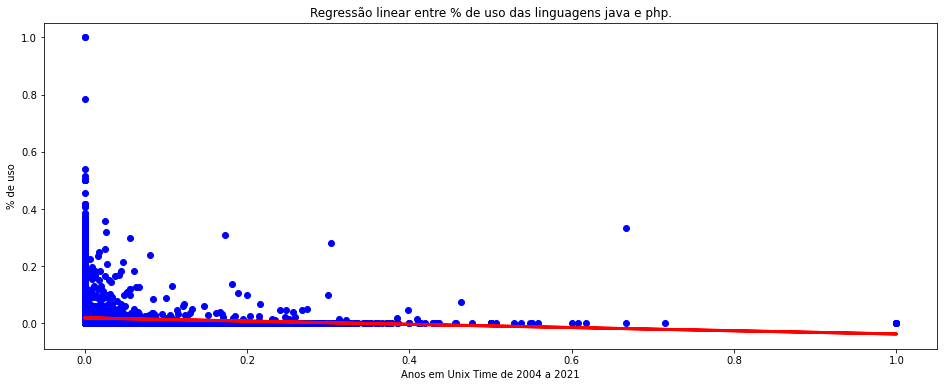

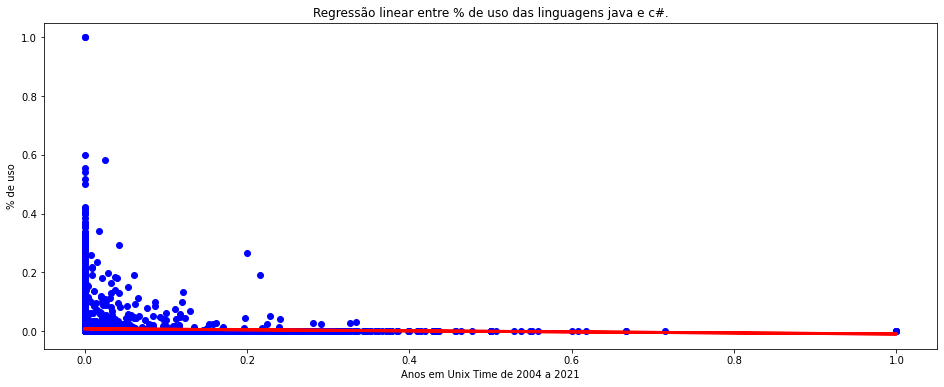

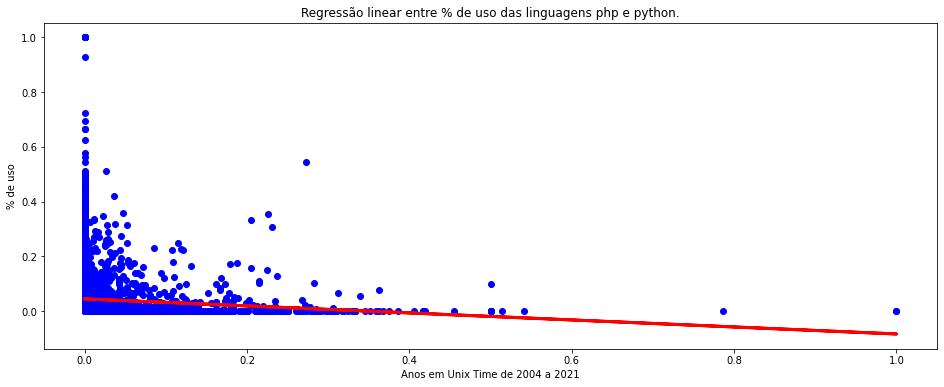

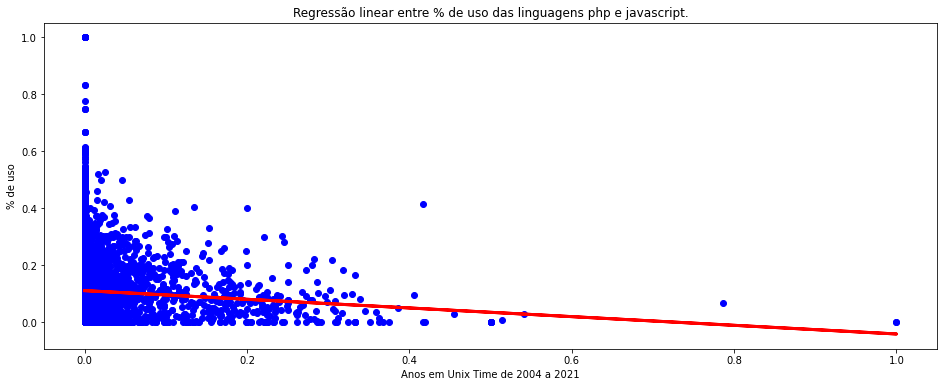

In [42]:
def prever_regressao_linguagem(linguagem_1, linguagem_2):
    df_linguagem = dados_2017[[linguagem_1, linguagem_2]]

    X = df_linguagem[linguagem_1].values.reshape(-1, 1)
    y = df_linguagem[linguagem_2].values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    plt.scatter(X_test, y_test,  color='blue')
    plt.plot(X_test, y_pred, color='red', linewidth=3)

    plt.gcf().set_size_inches(16, 6)

    plt.title('Regressão linear entre % de uso das linguagens {} e {}.'.format(linguagem_1, linguagem_2))
    plt.ylabel('% de uso')
    plt.xlabel('Anos em Unix Time de 2004 a 2021')

    plt.show()

for target in targets:
    prever_regressao_linguagem(target['linguagem_1'], target['linguagem_2'])

# Analisando o dataset do Stackoverflow

### Análise da Query no Stackoverflow:

https://data.stackexchange.com/stackoverflow/query

```sql
SELECT 
  YEAR(Posts.CreationDate) as 'Year',
  MONTH(Posts.CreationDate) as 'Month',
  Tags.tagName,
  COUNT(*) AS Question
FROM Tags
  LEFT JOIN PostTags ON PostTags.TagId = Tags.Id
  LEFT JOIN Posts ON Posts.Id = PostTags.PostId
WHERE
  Tags.tagName IN (
    'java',
    'javascript',
    'typescript',
    'python',
    'go',
    'c#', 
    'c', 
    'c++', 
    'php',
    'r'
  )
  AND Posts.CreationDate <= '2021-12-31'
GROUP BY
  YEAR(Posts.CreationDate), MONTH(Posts.CreationDate), Tags.TagName
ORDER BY 
  YEAR(Posts.CreationDate), MONTH(Posts.CreationDate) DESC
```

In [371]:
df_so = pd.read_csv('dados/stack_overflow/QueryResults.csv')

df_so.head()

,Year,Month,tagName,Question
0,2008,12,c,189
1,2008,12,javascript,626
2,2008,12,c#,1595
3,2008,12,c++,632
4,2008,12,python,440


In [372]:
df_so.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 4 columns):
Year        1545 non-null int64
Month       1545 non-null int64
tagName     1545 non-null object
Question    1545 non-null int64
dtypes: int64(3), object(1)
memory usage: 48.4+ KB


In [373]:
df_so = df_so.dropna()

In [374]:
df_so.tail()

,Year,Month,tagName,Question
1540,2021,1,python,26295
1541,2021,1,c,2728
1542,2021,1,r,5032
1543,2021,1,typescript,3044
1544,2021,1,php,5622


In [375]:
df_so.describe()

,Year,Month,Question
count,1545.000000,1545.000000,1545.000000
mean,2014.993528,6.604531,6932.346278
std,3.809071,3.464603,6340.638251
min,2008.000000,1.000000,1.000000
25%,2012.000000,4.000000,1908.000000
50%,2015.000000,7.000000,4586.000000
75%,2018.000000,10.000000,11484.000000
max,2021.000000,12.000000,29530.000000


In [376]:
df_so.Year

0       2008
1       2008
2       2008
3       2008
4       2008
        ... 
1540    2021
1541    2021
1542    2021
1543    2021
1544    2021
Name: Year, Length: 1545, dtype: int64

In [377]:
def tratar_nome(nome):
    if (nome == 'java'):
        return 'Java'
    
    if (nome == 'javascript'):
        return 'JavaScript'
    
    if (nome == 'typescript'):
        return 'TypeScript'
    
    if (nome == 'python'):
        return 'Python'
    
    if (nome == 'php'):
        return 'PHP'
    
    if (nome == 'c'):
        return 'C/C++'
    
    if (nome == 'c++'):
        return 'C/C++'
    
    if (nome == 'c#'):
        return 'C#'
    
    if (nome == 'go'):
        return 'Go'
    
    if (nome == 'r'):
        return 'R'
    
    return ''

dados_tratados_so = pd.DataFrame(
    {
        'Year': df_so['Year'],
        'Month': df_so['Month'],
        'Language': list(map(lambda x: tratar_nome(x), df_so['tagName'])),
        'Value': df_so['Question']
    }
)

dados_tratados_so.head()

,Year,Month,Language,Value
0,2008,12,C/C++,189
1,2008,12,JavaScript,626
2,2008,12,C#,1595
3,2008,12,C/C++,632
4,2008,12,Python,440


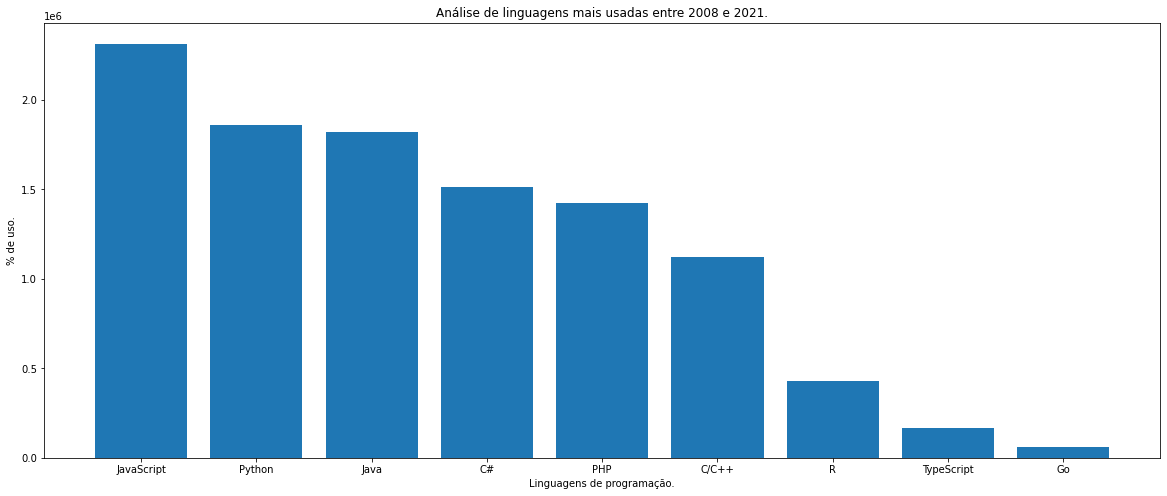

In [378]:
dados_tratados_so_gb = dados_tratados_so\
    .groupby(by=['Language'], as_index=False)\
    .sum()\
    .sort_values(by=['Value'], ascending=False)

fig, ax = plt.subplots()

ax.set_xticklabels(dados_tratados_so_gb['Language'])

ax.bar(x = dados_tratados_so_gb['Language'], height = dados_tratados_so_gb['Value'])

plt.gcf().set_size_inches(35, 10)

plt.savefig('imgs/Analise Linguagens Dataset 02.png')

configurar_plot_com_dimensoes(
    'Análise de linguagens mais usadas entre 2008 e 2021.',
    'Linguagens de programação.',
    '% de uso.',
    20, 
    8
)

In [382]:
def find_by_date_and_language(year, month, language):
    value = dados_tratados_so[
        (dados_tratados_so['Language'] == language) 
        & (dados_tratados_so['Year'] == year)
        & (dados_tratados_so['Month'] == month)
    ]['Value']
    if (value.empty):
        return 0
    return value.values[0]

transposed_data = []

for year in dados_tratados_so['Year'].unique():
    for month in dados_tratados_so['Month'].unique():
        data = {
            'Year': year,
            'Month': month,
            'JavaScript': find_by_date_and_language(year, month, 'JavaScript'),
            'TypeScript': find_by_date_and_language(year, month, 'TypeScript'),
            'Python': find_by_date_and_language(year, month, 'Python'),
            'Java': find_by_date_and_language(year, month, 'Java'),
            'C#': find_by_date_and_language(year, month, 'C#'),
            'PHP': find_by_date_and_language(year, month, 'PHP'),
            'C/C++': find_by_date_and_language(year, month, 'C/C++'),
            'R': find_by_date_and_language(year, month, 'R'),
            'Go': find_by_date_and_language(year, month, 'Go')
        }
        transposed_data.append(data)

correlation_df = pd.DataFrame(transposed_data, columns =[
    'Year',
    'Month', 
    'JavaScript',
    'TypeScript',
    'Python',
    'Java',
    'C#',
    'PHP',
    'C/C++',
    'R',
    'Go'
])
correlation_df.tail(10)

,Year,Month,JavaScript,TypeScript,Python,Java,C#,PHP,C/C++,R,Go
158,2021,10,16313,3333,23076,7842,6077,4319,4103,4759,763
159,2021,9,16714,3237,21998,7817,5770,4326,3922,4332,662
160,2021,8,17058,3265,23142,7958,5764,4592,1622,4575,786
161,2021,7,17349,3163,24127,8340,5934,4618,3787,4677,650
162,2021,6,17621,3188,24532,9202,6419,4858,1996,4942,644
163,2021,5,18404,3129,26032,9675,6533,5065,2246,5393,698
164,2021,4,18602,3255,26455,9484,6737,5086,4315,5607,682
165,2021,3,19773,3530,28106,10393,7302,5556,4714,6076,823
166,2021,2,17911,2937,24928,9124,6586,5231,2349,5033,626
167,2021,1,19484,3044,26295,9531,6926,5622,4501,5032,604


Verificando a correlação Pearson entre os % de uso das linguagens: Java e JavaScript.
0.8963935274210103
Java e JavaScript possuem correlação linear positiva.

Verificando a correlação Pearson entre os % de uso das linguagens: Java e Python.
0.41358405693198974
Java e Python possuem correlação linear positiva.

Verificando a correlação Pearson entre os % de uso das linguagens: JavaScript e Python.
0.7456285733108394
JavaScript e Python possuem correlação linear positiva.

Verificando a correlação Pearson entre os % de uso das linguagens: JavaScript e TypeScript.
0.5078329711876486
JavaScript e TypeScript possuem correlação linear positiva.

Verificando a correlação Pearson entre os % de uso das linguagens: Java e C/C++.
0.7681292161842145
Java e C/C++ possuem correlação linear positiva.

Verificando a correlação Pearson entre os % de uso das linguagens: PHP e JavaScript.
0.765888322106922
PHP e JavaScript possuem correlação linear positiva.

Verificando a correlação Pearson entre os % 

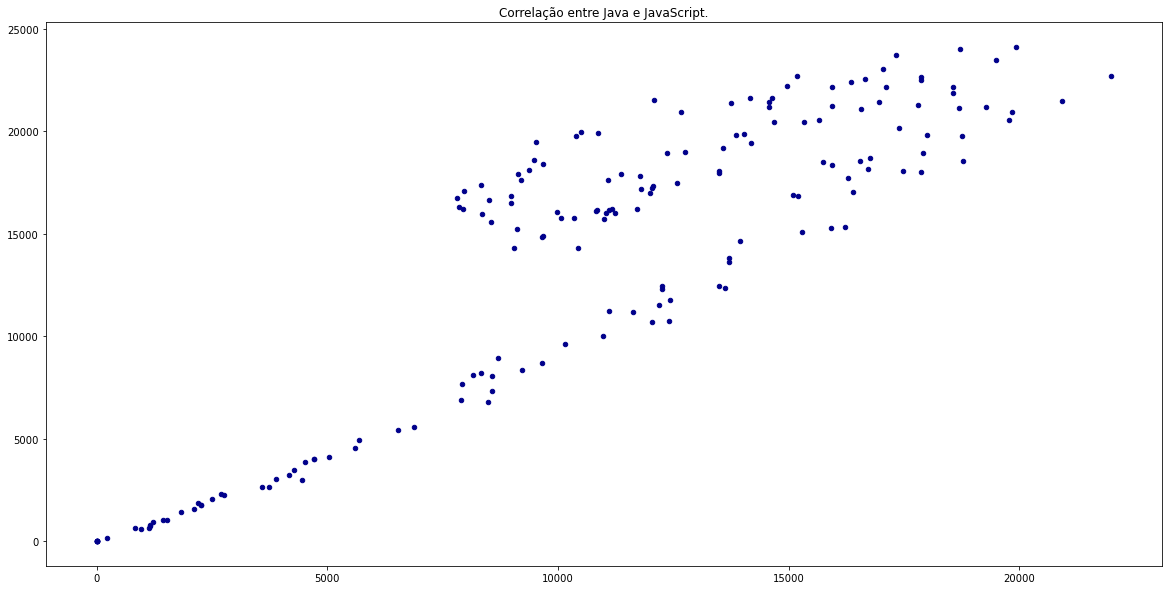

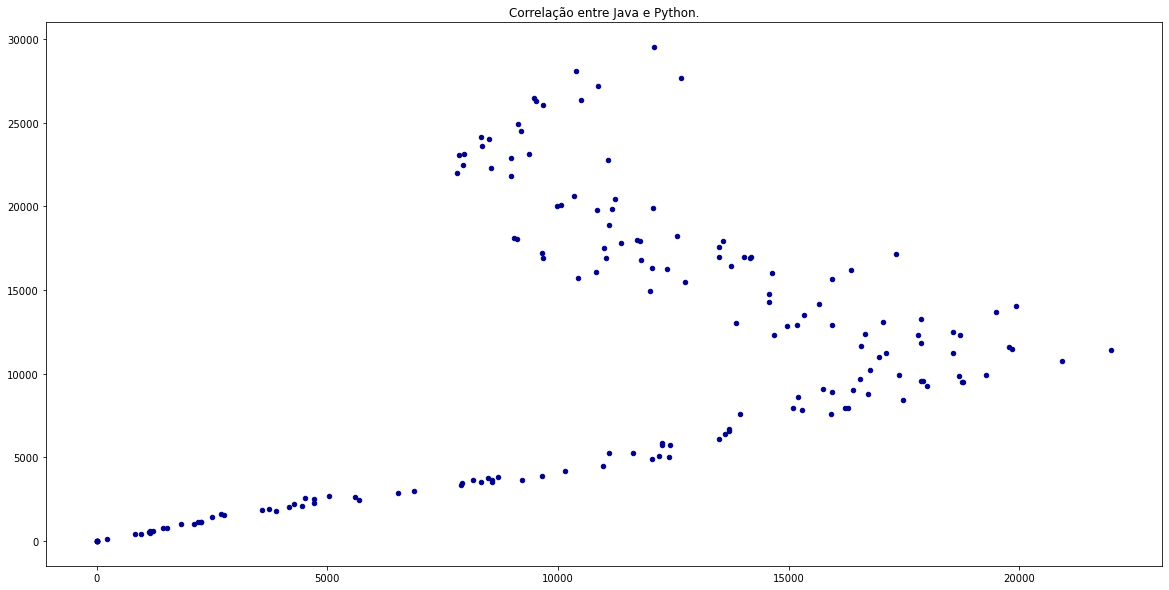

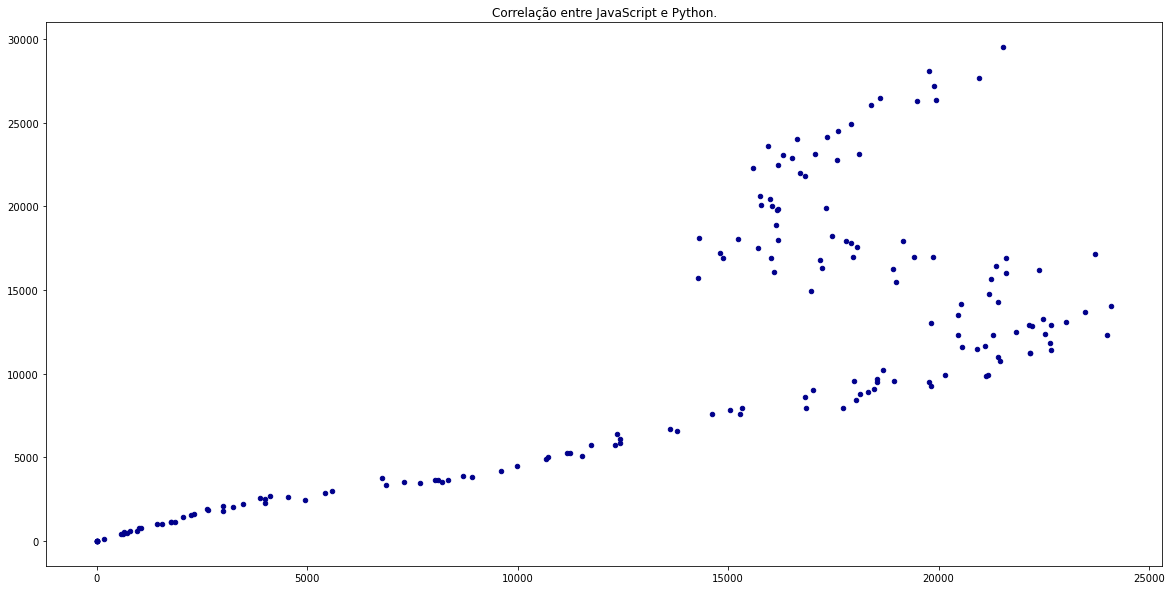

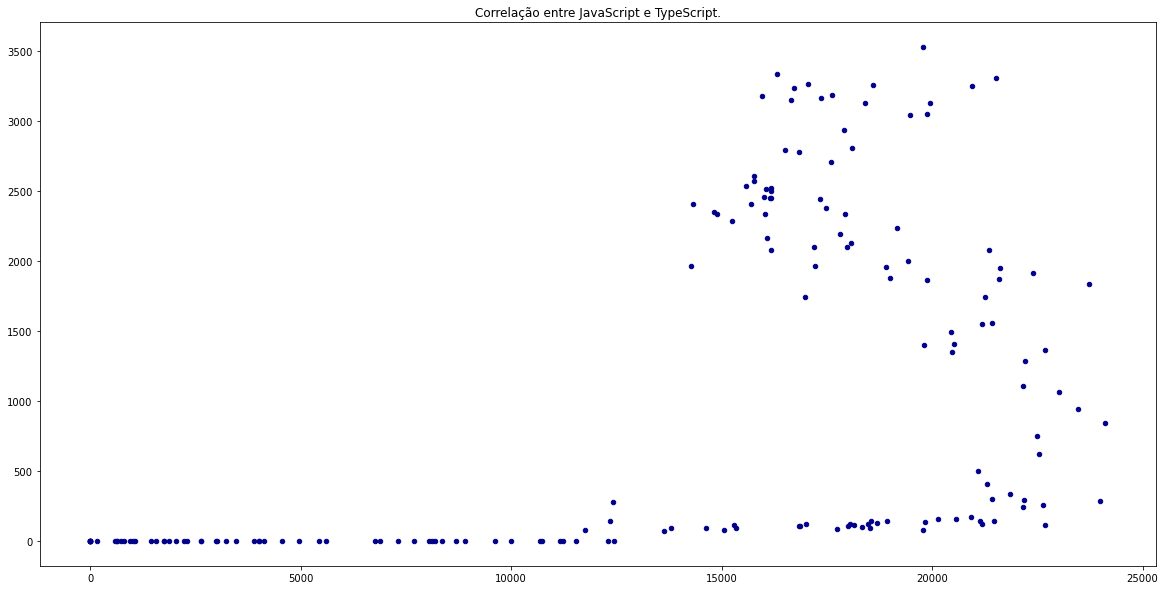

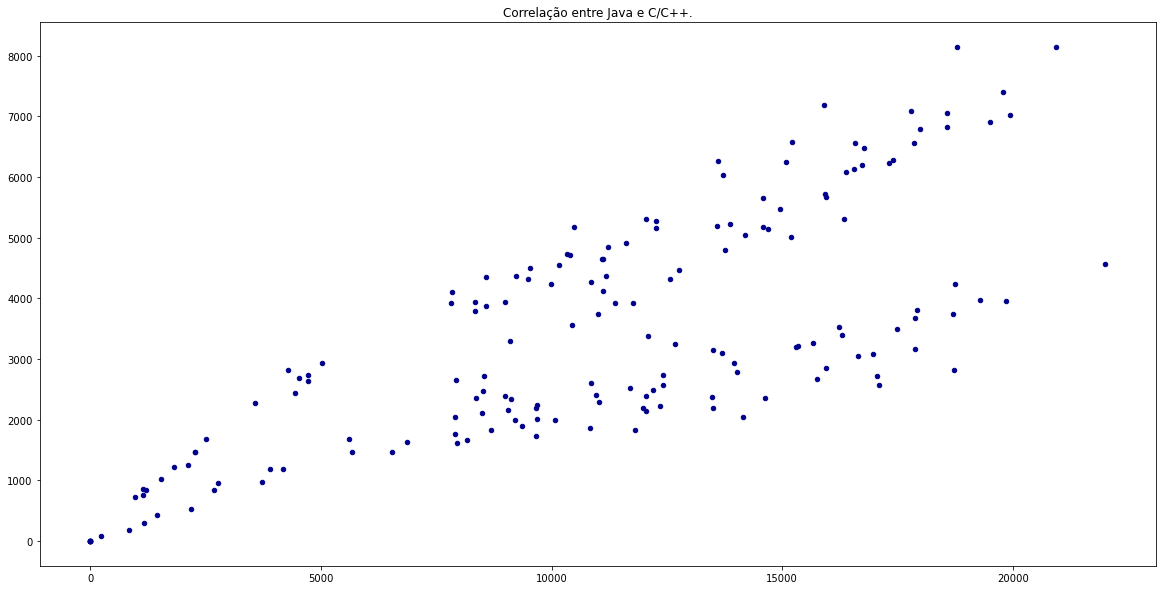

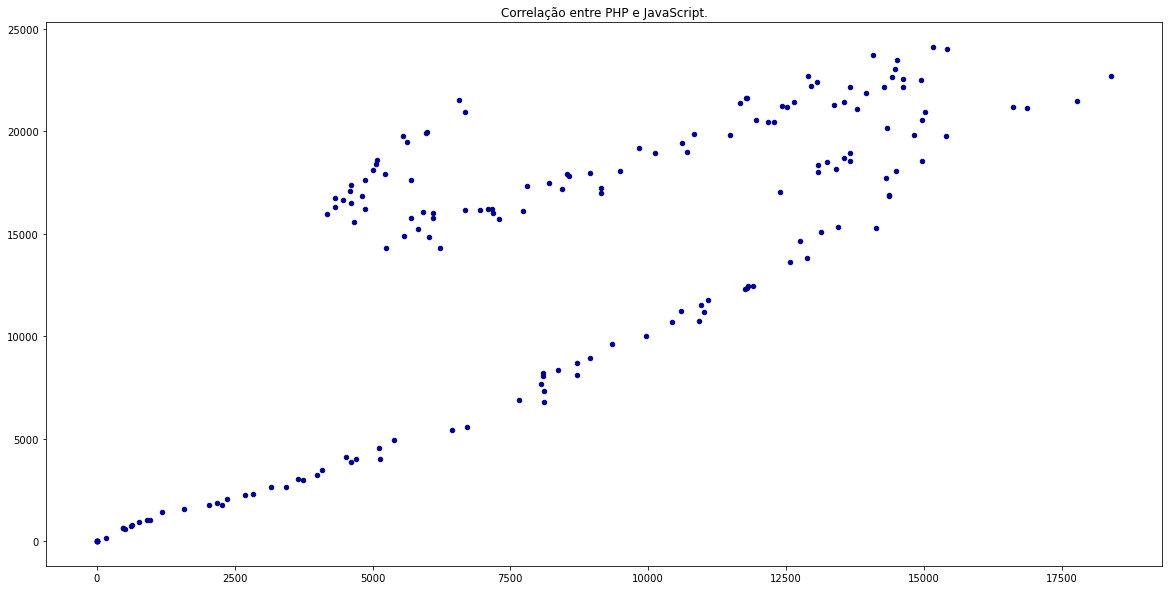

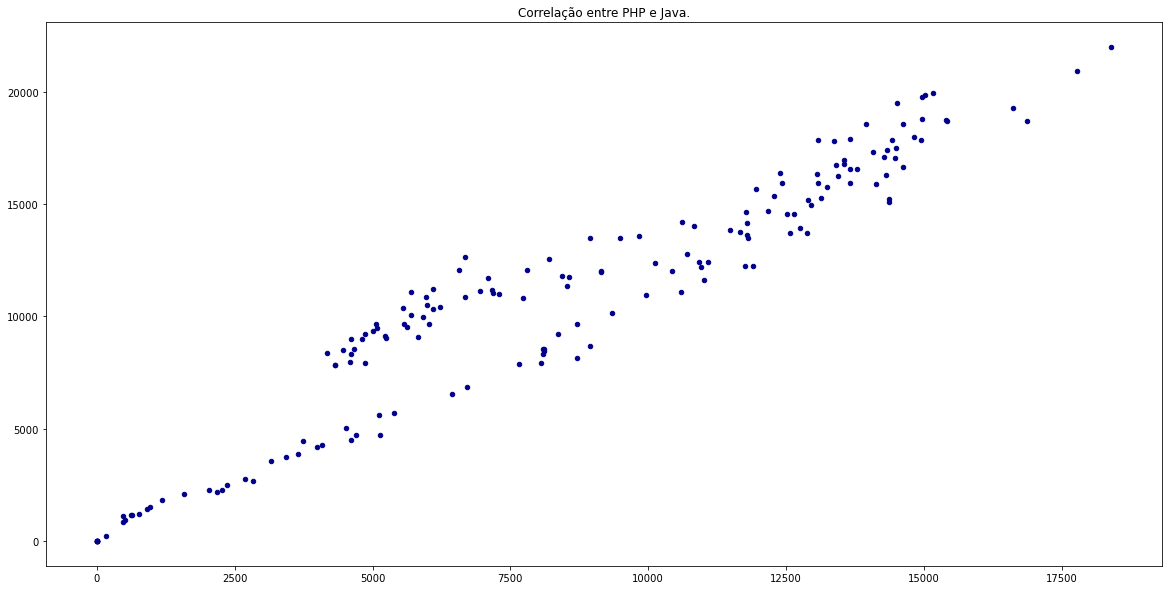

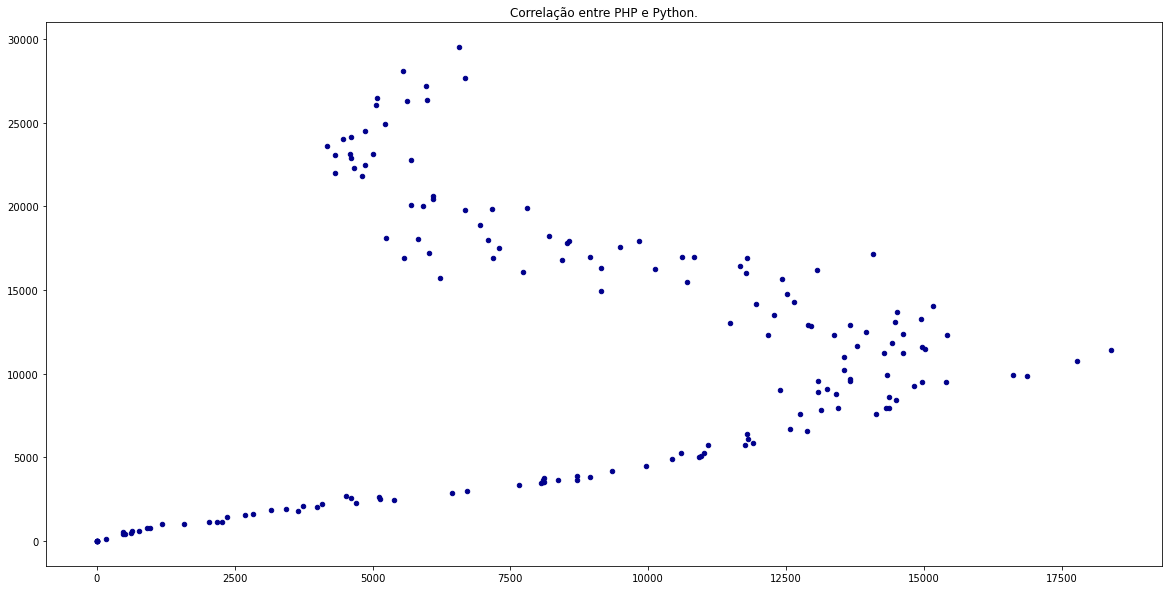

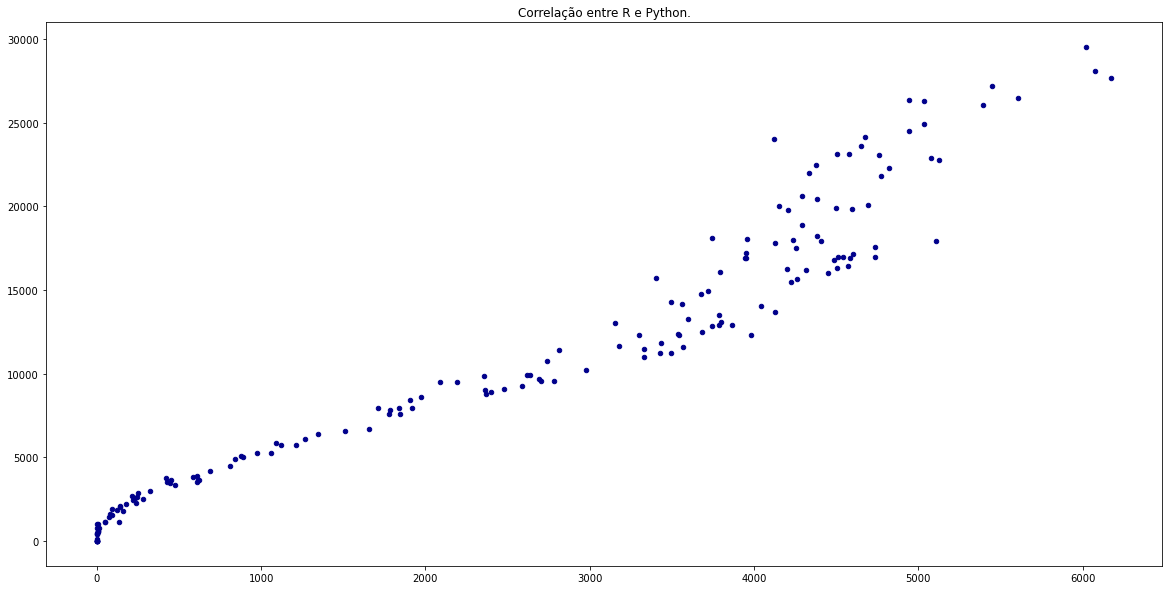

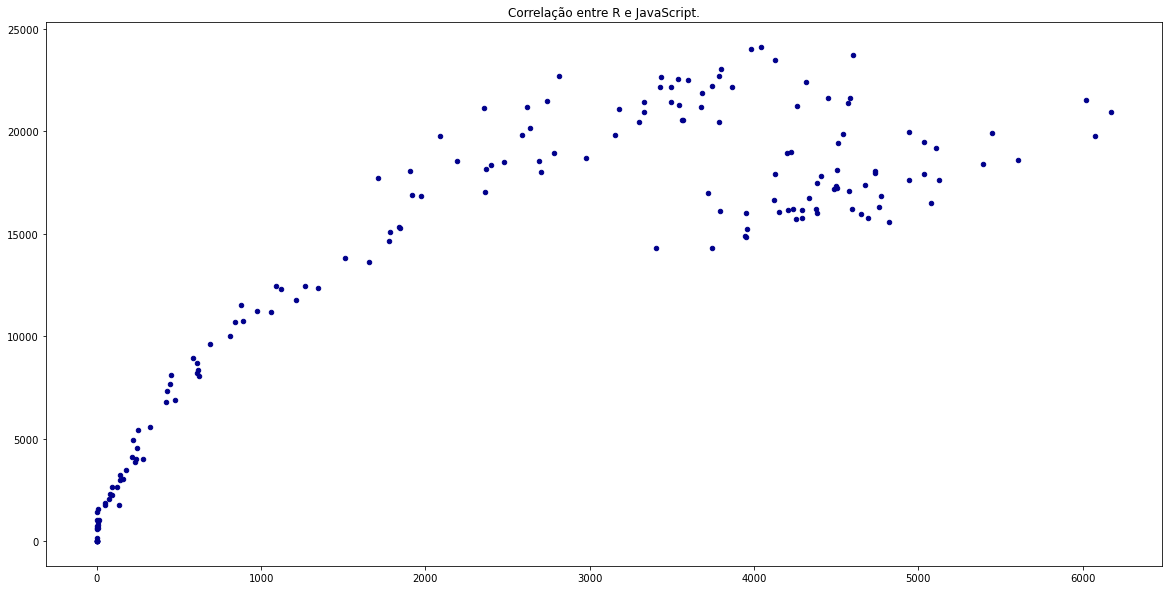

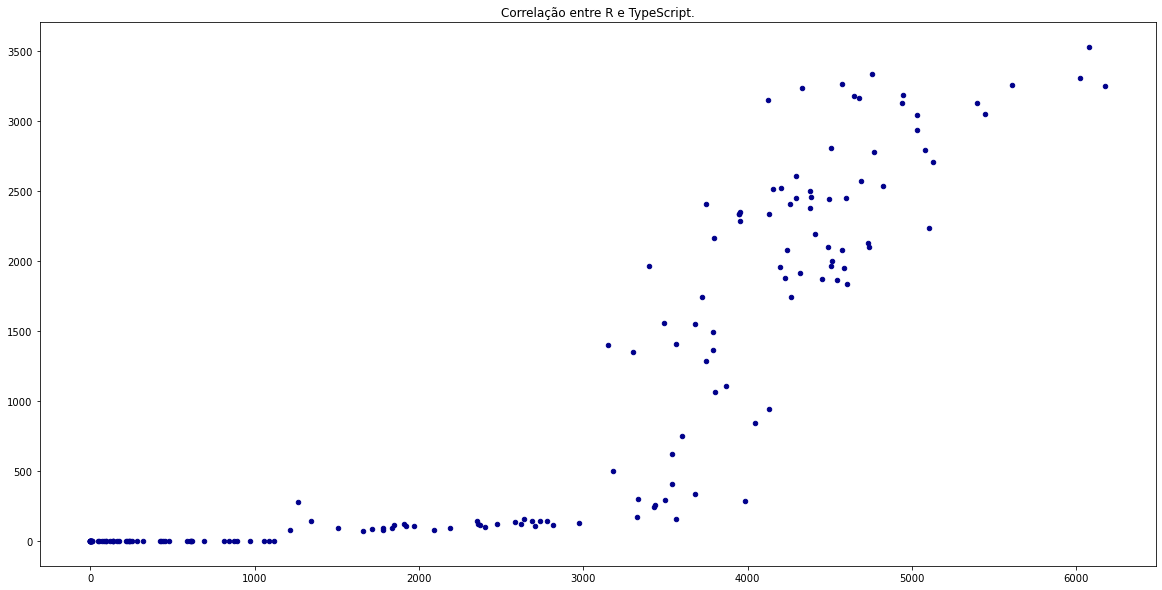

In [380]:
targets = [
    {
        'linguagem_1': 'Java',
        'linguagem_2': 'JavaScript'
    },
    {
        'linguagem_1': 'Java',
        'linguagem_2': 'Python'
    },
    {
        'linguagem_1': 'JavaScript',
        'linguagem_2': 'Python'
    },
    {
        'linguagem_1': 'JavaScript',
        'linguagem_2': 'TypeScript'
    },
    {
        'linguagem_1': 'Java',
        'linguagem_2': 'C/C++'
    },
    {
        'linguagem_1': 'PHP',
        'linguagem_2': 'JavaScript'
    },
    {
        'linguagem_1': 'PHP',
        'linguagem_2': 'Java'
    },
    {
        'linguagem_1': 'PHP',
        'linguagem_2': 'Python'
    },
    {
        'linguagem_1': 'R',
        'linguagem_2': 'Python'
    },
    {
        'linguagem_1': 'R',
        'linguagem_2': 'JavaScript'
    },
    {
        'linguagem_1': 'R',
        'linguagem_2': 'TypeScript'
    }
]

def verificar_correlacao(linguagem_1, linguagem_2):
    print('Verificando a correlação Pearson entre os % de uso das linguagens: {} e {}.'.format(linguagem_1, linguagem_2))
    corr = correlation_df[linguagem_1].corr(correlation_df[linguagem_2])
    result = ''
    print(corr)
    if (corr == 1):
        result = 'correlação linear positiva perfeita'
    if (corr > 0):
        result = 'correlação linear positiva'
    if (corr == 0):
        result = 'correlação linear inexistente'
    if (corr == -1):
        result = 'correlação linear negativa perfeita'
    if (corr < 0):
        result = 'correlação linear negativa'
    print('{} e {} possuem {}.\n'.format(linguagem_1, linguagem_2, result))
    
    
def plotar_correlacao(linguagem_1, linguagem_2):
    correlation_df.plot.scatter(x = linguagem_1, y = linguagem_2, c = 'Darkblue')

    configurar_plot_com_dimensoes('Correlação entre {} e {}.'.format(linguagem_1, linguagem_2), '', '', 20, 10)

for target in targets:
    verificar_correlacao(target['linguagem_1'], target['linguagem_2'])
    
for target in targets:
    plotar_correlacao(target['linguagem_1'], target['linguagem_2'])

### Realizando o Merge com os dados do Github

In [277]:
dados_tratados.head()

,Date,Year,Timestamp,Language,Value,UnixTime
0,July 2004,2004,2004-07-01,Abap,0.34,1.088640e+09
1,August 2004,2004,2004-08-01,Abap,0.36,1.091318e+09
2,September 2004,2004,2004-09-01,Abap,0.41,1.093997e+09
3,October 2004,2004,2004-10-01,Abap,0.40,1.096589e+09
4,November 2004,2004,2004-11-01,Abap,0.38,1.099267e+09


In [52]:
def extrair_mes_data(data):
    if ('January' in data):
        return 1
    if ('February' in data):
        return 2
    if ('March' in data):
        return 3
    if ('April' in data):
        return 4
    if ('May' in data):
        return 5
    if ('June' in data):
        return 6
    if ('July' in data):
        return 7
    if ('August' in data):
        return 8
    if ('September' in data):
        return 9
    if ('October' in data):
        return 10
    if ('November' in data):
        return 11
    if ('December' in data):
        return 12

dados_tratados_novo = pd.DataFrame(
    {
        'Year': dados_tratados['Year'],
        'Month': list(map(lambda x: extrair_mes_data(x), dados_tratados['Date'])),
        'Language': dados_tratados['Language'],
        'Value': dados_tratados['Value']
    }
)

dados_tratados_novo = dados_tratados_novo[
    (dados_tratados_novo['Language'] == 'Java') |
    (dados_tratados_novo['Language'] == 'JavaScript') |
    (dados_tratados_novo['Language'] == 'Python') |
    (dados_tratados_novo['Language'] == 'C/C++') |
    (dados_tratados_novo['Language'] == 'C#') |
    (dados_tratados_novo['Language'] == 'PHP') |
    (dados_tratados_novo['Language'] == 'Go')
]

In [53]:
merge = pd.merge(dados_tratados_novo, dados_tratados_so, how='left', on=['Year', 'Month', 'Language'])
merge = merge.dropna()
merge.head()

,Year,Month,Language,Value_x,Value_y
49,2008,8,C/C++,7.82,163.0
50,2008,8,C/C++,7.82,83.0
51,2008,9,C/C++,7.94,320.0
52,2008,9,C/C++,7.94,754.0
53,2008,10,C/C++,8.10,810.0


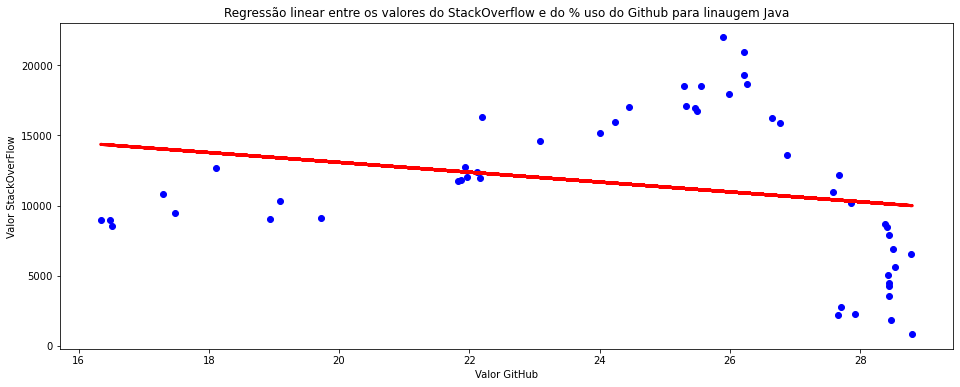

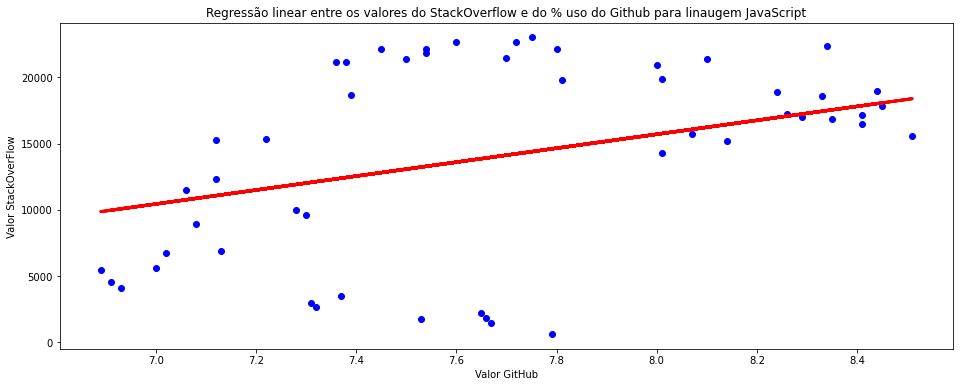

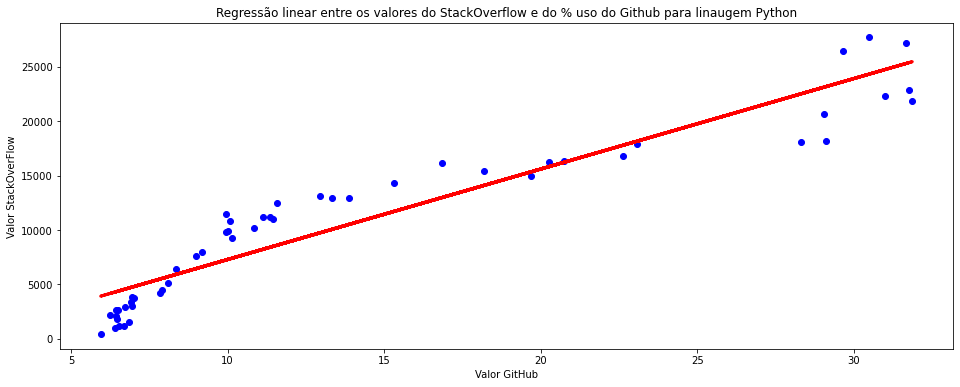

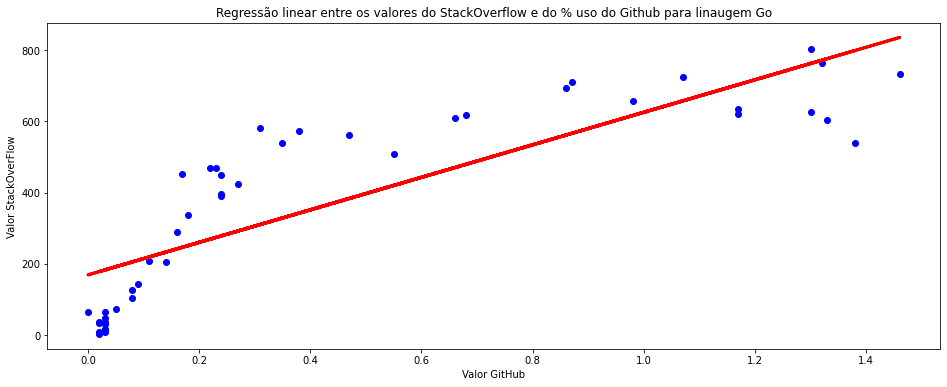

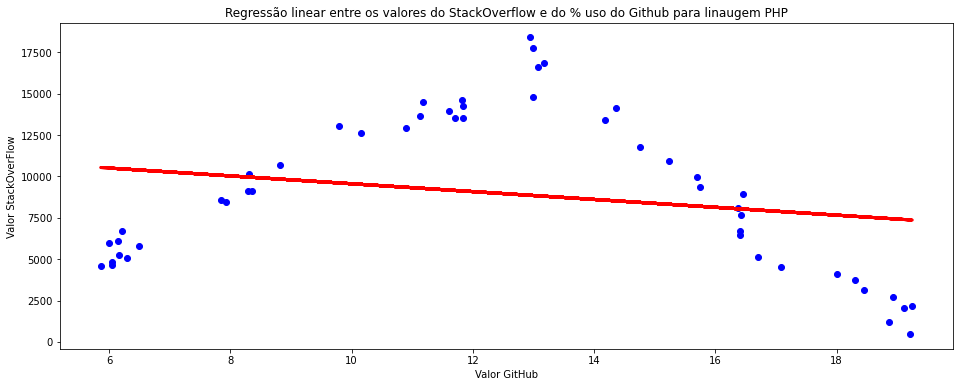

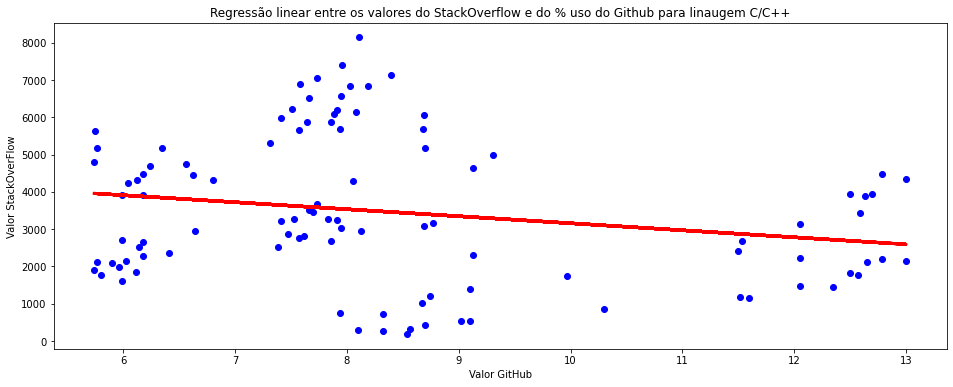

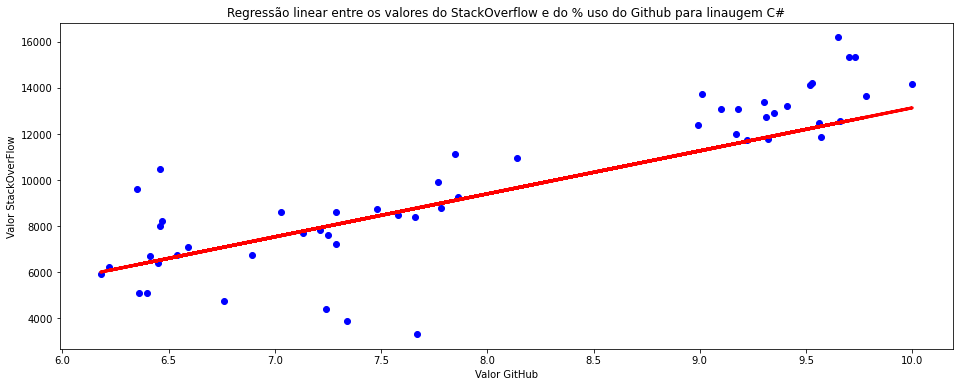

In [54]:
def prever_regressao_linguagem(linguagem):
    df_linguagem = merge[merge['Language'] == linguagem]

    X = df_linguagem['Value_x'].values.reshape(-1, 1)
    y = df_linguagem['Value_y'].values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    plt.scatter(X_test, y_test,  color='blue')
    plt.plot(X_test, y_pred, color='red', linewidth=3)

    plt.gcf().set_size_inches(16, 6)

    plt.ylabel('Valor StackOverFlow')
    plt.xlabel('Valor GitHub')
    plt.title('Regressão linear entre os valores do StackOverflow e do % uso do Github para linguagem {}'.format(linguagem))

    plt.show()
    
prever_regressao_linguagem('Java')
prever_regressao_linguagem('JavaScript')
prever_regressao_linguagem('Python')
prever_regressao_linguagem('Go')
prever_regressao_linguagem('PHP')
prever_regressao_linguagem('C/C++')
prever_regressao_linguagem('C#')

### Instanciando o algoritmo K-Nearest Neighbors para os valores do Github

In [55]:
X = merge.Value_x.values.reshape(-1, 1)
y = merge.Language.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred

array(['Go', 'C/C++', 'C/C++', 'C/C++', 'Go', 'C/C++', 'Java', 'Python',
       'JavaScript', 'C/C++', 'Go', 'C/C++', 'C/C++', 'Go', 'C/C++', 'Go',
       'Go', 'Go', 'C/C++', 'C/C++', 'PHP', 'C#', 'C/C++', 'C/C++', 'C#',
       'C/C++', 'C/C++', 'Java', 'Python', 'Python', 'Go', 'C/C++', 'PHP',
       'Python', 'C/C++', 'C/C++', 'C#', 'Java', 'PHP', 'C/C++', 'C/C++',
       'C/C++', 'JavaScript', 'C/C++', 'Python', 'C/C++', 'C/C++', 'Go',
       'Java', 'PHP', 'Java', 'C/C++', 'C/C++', 'Java', 'Go', 'Go',
       'C/C++', 'JavaScript', 'Go', 'C/C++', 'Go', 'C/C++', 'C/C++', 'Go',
       'Java', 'C/C++', 'JavaScript', 'C/C++', 'C#', 'Java', 'C#',
       'Python', 'C/C++', 'C#', 'C#', 'C/C++', 'PHP', 'C/C++', 'C/C++',
       'PHP', 'C#', 'C/C++', 'C#', 'JavaScript', 'C/C++', 'PHP', 'Java',
       'C#', 'JavaScript', 'Java', 'JavaScript', 'C/C++', 'C/C++', 'PHP',
       'PHP', 'C/C++', 'PHP', 'C/C++', 'Java', 'C/C++', 'C/C++', 'PHP',
       'Java', 'C/C++', 'C/C++', 'C/C++', 'Java', 'PHP'

In [56]:
knn.predict_proba(X_test)

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.33333333, 0.        , ..., 0.33333333, 0.33333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.66666667,
        0.33333333]])

In [57]:
accuracy_score(y_test, y_pred)

0.5870646766169154

### Instanciando o algoritmo Naive Bayes para os valores do Github

In [58]:
from sklearn.naive_bayes import GaussianNB

X = merge.Value_x.values.reshape(-1, 1)
y = merge.Language.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

naive_bayes = GaussianNB()

pred = naive_bayes.fit(X_train, y_train)

y_pred = pred.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred)

0.49502487562189057

### Instanciando o algoritmo Support Vector Machines (SVM) para os valores do Github

In [60]:
X = merge.Value_x.values.reshape(-1, 1)
y = merge.Language.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = svm.SVC()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array(['Go', 'C/C++', 'C/C++', 'C/C++', 'Go', 'C/C++', 'Java', 'Java',
       'C/C++', 'C/C++', 'Go', 'C/C++', 'C/C++', 'Go', 'C/C++', 'Go',
       'Go', 'Go', 'C/C++', 'C/C++', 'PHP', 'C/C++', 'C/C++', 'C/C++',
       'C/C++', 'C/C++', 'C/C++', 'Java', 'Python', 'Python', 'Go',
       'C/C++', 'C/C++', 'C/C++', 'C/C++', 'PHP', 'C/C++', 'Java', 'PHP',
       'C/C++', 'C/C++', 'C/C++', 'C/C++', 'C/C++', 'Java', 'C/C++',
       'C/C++', 'Go', 'Java', 'C/C++', 'PHP', 'C/C++', 'C/C++', 'Java',
       'Go', 'Go', 'C/C++', 'C/C++', 'Go', 'C/C++', 'Go', 'C/C++',
       'C/C++', 'Go', 'Java', 'C/C++', 'C/C++', 'C/C++', 'C/C++', 'Java',
       'C/C++', 'Java', 'C/C++', 'C/C++', 'C/C++', 'C/C++', 'PHP',
       'C/C++', 'C/C++', 'PHP', 'C/C++', 'C/C++', 'C/C++', 'C/C++',
       'C/C++', 'C/C++', 'PHP', 'C/C++', 'C/C++', 'PHP', 'C/C++', 'C/C++',
       'C/C++', 'PHP', 'PHP', 'C/C++', 'PHP', 'C/C++', 'Java', 'C/C++',
       'C/C++', 'PHP', 'PHP', 'C/C++', 'C/C++', 'C/C++', 'Java', 'PHP',
       'C/

In [61]:
accuracy_score(y_test, y_pred)

0.5373134328358209

In [62]:
def realizar_previsoes(algoritmo, base, use_scalling):
    target = []
    
    if (base == 'github'):
        target = merge.Value_x
    else:
        target = merge.Value_y
    
    y = merge.Language.values.reshape(-1, 1)
    X = target.values.reshape(-1, 1)
    
    if (use_scalling):
        X = preprocessing.StandardScaler().fit(X).transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    y_pred = []
    
    if (algoritmo == 'knn'):
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
    
    if (algoritmo == 'naive_bayes'):
        naive_bayes = GaussianNB()
        naive_bayes.fit(X_train, y_train)
        y_pred = pred.predict(X_test)
        
    if (algoritmo == 'svm'):
        clf = svm.SVC()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
    score = accuracy_score(y_test, y_pred) 
    classificacao = classification_report(y_test, y_pred) 
    
    print('Algoritmo: {}\nDados do: {}\nScore: {}\nRelatório de classificação:'.format(algoritmo, base, score))
    print(classificacao)
    return score

### Realizando previsões com normalização

Algoritmo: knn
Dados do: github
Score: 0.5870646766169154
Relatório de classificação:
              precision    recall  f1-score   support

          C#       0.37      0.37      0.37        60
       C/C++       0.51      0.71      0.59       103
          Go       1.00      1.00      1.00        53
        Java       0.82      0.85      0.84        48
  JavaScript       0.47      0.43      0.45        46
         PHP       0.53      0.46      0.49        46
      Python       0.46      0.13      0.20        46

    accuracy                           0.59       402
   macro avg       0.59      0.56      0.56       402
weighted avg       0.58      0.59      0.57       402

Algoritmo: naive_bayes
Dados do: github
Score: 0.017412935323383085
Relatório de classificação:
              precision    recall  f1-score   support

          C#       0.00      0.00      0.00        60
       C/C++       0.00      0.00      0.00       103
          Go       0.00      0.00      0.00        53
    

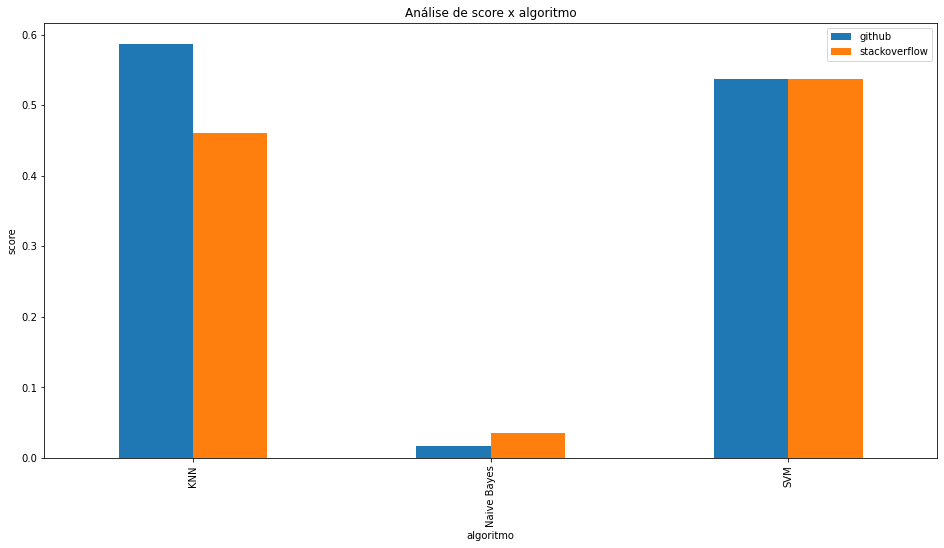

In [63]:
github_knn = realizar_previsoes('knn', 'github', True)
github_naive_bayes = realizar_previsoes('naive_bayes', 'github', True)
github_svm = realizar_previsoes('svm', 'github', True)

stackoverflow_knn = realizar_previsoes('knn', 'stackoverflow', True)
stackoverflow_naive_bayes = realizar_previsoes('naive_bayes', 'stackoverflow', True)
stackoverflow_svm = realizar_previsoes('svm', 'stackoverflow', True)

resultados = pd.DataFrame({
    'algoritmo': ['KNN', 'Naive Bayes', 'SVM'],
    'github': [github_knn, github_naive_bayes, github_svm],
    'stackoverflow': [stackoverflow_knn, stackoverflow_naive_bayes, stackoverflow_svm]
})

print(resultados.head())

resultados.plot(kind = 'bar', x='algoritmo')
configurar_plot('Análise de score x algoritmo', 'algoritmo', 'score')

### Realizando previsões sem normalização

Algoritmo: knn
Dados do: github
Score: 0.5870646766169154
Relatório de classificação:
              precision    recall  f1-score   support

          C#       0.37      0.37      0.37        60
       C/C++       0.51      0.71      0.59       103
          Go       1.00      1.00      1.00        53
        Java       0.82      0.85      0.84        48
  JavaScript       0.47      0.43      0.45        46
         PHP       0.53      0.46      0.49        46
      Python       0.46      0.13      0.20        46

    accuracy                           0.59       402
   macro avg       0.59      0.56      0.56       402
weighted avg       0.58      0.59      0.57       402

Algoritmo: naive_bayes
Dados do: github
Score: 0.49502487562189057
Relatório de classificação:
              precision    recall  f1-score   support

          C#       0.00      0.00      0.00        60
       C/C++       0.37      0.51      0.43       103
          Go       1.00      1.00      1.00        53
     

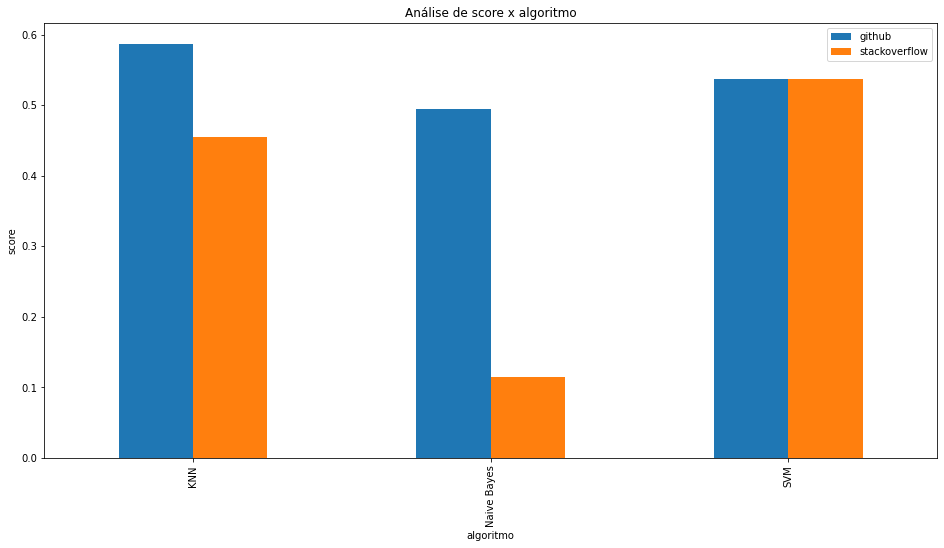

In [64]:
github_knn = realizar_previsoes('knn', 'github', False)
github_naive_bayes = realizar_previsoes('naive_bayes', 'github', False)
github_svm = realizar_previsoes('svm', 'github', False)

stackoverflow_knn = realizar_previsoes('knn', 'stackoverflow', False)
stackoverflow_naive_bayes = realizar_previsoes('naive_bayes', 'stackoverflow', False)
stackoverflow_svm = realizar_previsoes('svm', 'stackoverflow', False)

resultados = pd.DataFrame({
    'algoritmo': ['KNN', 'Naive Bayes', 'SVM'],
    'github': [github_knn, github_naive_bayes, github_svm],
    'stackoverflow': [stackoverflow_knn, stackoverflow_naive_bayes, stackoverflow_svm]
})

print(resultados.head())

resultados.plot(kind = 'bar', x='algoritmo')
configurar_plot('Análise de score x algoritmo', 'algoritmo', 'score')

### Realizando previsões com normalização em KNN e SVM, e sem normalização em GNB

Algoritmo: knn
Dados do: github
Score: 0.5870646766169154
Relatório de classificação:
              precision    recall  f1-score   support

          C#       0.37      0.37      0.37        60
       C/C++       0.51      0.71      0.59       103
          Go       1.00      1.00      1.00        53
        Java       0.82      0.85      0.84        48
  JavaScript       0.47      0.43      0.45        46
         PHP       0.53      0.46      0.49        46
      Python       0.46      0.13      0.20        46

    accuracy                           0.59       402
   macro avg       0.59      0.56      0.56       402
weighted avg       0.58      0.59      0.57       402

Algoritmo: naive_bayes
Dados do: github
Score: 0.49502487562189057
Relatório de classificação:
              precision    recall  f1-score   support

          C#       0.00      0.00      0.00        60
       C/C++       0.37      0.51      0.43       103
          Go       1.00      1.00      1.00        53
     

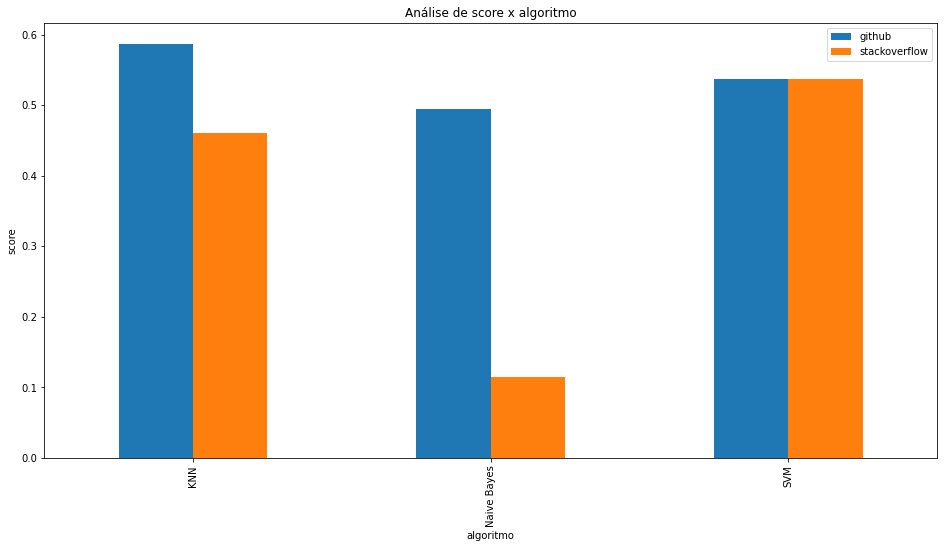

In [65]:
github_knn = realizar_previsoes('knn', 'github', True)
github_naive_bayes = realizar_previsoes('naive_bayes', 'github', False)
github_svm = realizar_previsoes('svm', 'github', True)

stackoverflow_knn = realizar_previsoes('knn', 'stackoverflow', True)
stackoverflow_naive_bayes = realizar_previsoes('naive_bayes', 'stackoverflow', False)
stackoverflow_svm = realizar_previsoes('svm', 'stackoverflow', True)

resultados = pd.DataFrame({
    'algoritmo': ['KNN', 'Naive Bayes', 'SVM'],
    'github': [github_knn, github_naive_bayes, github_svm],
    'stackoverflow': [stackoverflow_knn, stackoverflow_naive_bayes, stackoverflow_svm]
})

print(resultados.head())

resultados.plot(kind = 'bar', x='algoritmo')
configurar_plot('Análise de score x algoritmo', 'algoritmo', 'score')